In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.optimize import least_squares as lsq
import random
random.seed(4321)
np.random.seed(1234)

In [82]:
PolRel = pd.read_excel("Seshat_PolityRelationData.xlsx")
Data = pd.read_csv("Seshat Data.csv")
Parameters_and_Times = np.loadtxt("Parameters_and_Times.txt")
RelTimeDF = pd.read_csv("RelTime_TimeSeries_SPC1.csv", index_col = 0)
RelTimeCCDF = pd.read_csv("RelTime_TimeSeries_CC.csv")
Parameters = Parameters_and_Times[:4]
Times = Parameters_and_Times[4:]
T = 5000

In [83]:
def f(x, a, b, c, d):
    # the logistic function in its most general shape, scaled by T=5000
    return a / (1. + np.exp(-c * (x - d))) + b

In [84]:
del RelTimeCCDF["Unnamed: 0"]

In [85]:
set(Data["NGA"]).issubset(set(PolRel["NGA"]))

True

In [86]:
# Discard superfluous NGAs
SubsetNGA = np.array(PolRel["NGA"].isin(set(Data["NGA"])))
PolRel = PolRel.iloc[SubsetNGA]


In [87]:
PolRel.head(50)

,NGA,PolID,Longform.Name,Polity.Start,Polity.End,Dupl,Section,Variable,Value.From,Value.To,Value.Date.From,Value.Date.To
13,Big Island Hawaii,Hawaii1,Hawaii I,1000.0,1200.0,n,General variables,succeeding (quasi)polity,Hawaii II,NaN,NaN,NaN
14,Big Island Hawaii,Hawaii2,Hawaii II,1200.0,1580.0,n,General variables,succeeding (quasi)polity,Hawaii III,NaN,NaN,NaN
15,Big Island Hawaii,Hawaii2,Hawaii II,1200.0,1580.0,n,General variables,relationship to preceding (quasi)polity,continuity,NaN,NaN,NaN
16,Big Island Hawaii,Hawaii3,Hawaii III,1580.0,1778.0,n,General variables,succeeding (quasi)polity,Kingdom of Hawaii - Kamehameha Period,NaN,NaN,NaN
17,Cahokia,USMisEW,Cahokia - Early Woodland,-600.0,-150.0,n,General variables,succeeding (quasi)polity,Cahokia - Middle Woodland,NaN,NaN,NaN
18,Cahokia,USMisEW,Cahokia - Early Woodland,-600.0,-150.0,n,General variables,relationship to preceding (quasi)polity,continuity,NaN,NaN,NaN
19,Cahokia,USMisMW,Cahokia - Middle Woodland,-150.0,300.0,n,General variables,succeeding (quasi)polity,Cahokia - Late Woodland I,NaN,NaN,NaN
20,Cahokia,USMisMW,Cahokia - Middle Woodland,-150.0,300.0,n,General variables,relationship to preceding (quasi)polity,Continuity,NaN,NaN,NaN
21,Cahokia,USMisRo,Cahokia - Late Woodland I,300.0,450.0,n,General variables,succeeding (quasi)polity,Cahokia - Late Woodland II,NaN,NaN,NaN
22,Cahokia,USMisRo,Cahokia - Late Woodland I,300.0,450.0,n,General variables,relationship to preceding (quasi)polity,Continuity,NaN,NaN,NaN


In [88]:
for i in list(set(PolRel["Dupl"])):
    print(i,sum(PolRel["Dupl"] == i))

n 596
y 103


In [89]:
# relationship to preceding (quasi)polity

for v in list(set(PolRel["Variable"])):
    print(v, sum(PolRel["Variable"]==v))

# Logical for Variable is the relationship
VR = PolRel["Variable"] == "relationship to preceding (quasi)polity"

Previous = PolRel.loc[np.logical_not(VR)]
Relationships = PolRel.loc[VR]

succeeding (quasi)polity 364
relationship to preceding (quasi)polity 335


In [90]:
Previous.head()

,NGA,PolID,Longform.Name,Polity.Start,Polity.End,Dupl,Section,Variable,Value.From,Value.To,Value.Date.From,Value.Date.To
13,Big Island Hawaii,Hawaii1,Hawaii I,1000.0,1200.0,n,General variables,succeeding (quasi)polity,Hawaii II,NaN,NaN,NaN
14,Big Island Hawaii,Hawaii2,Hawaii II,1200.0,1580.0,n,General variables,succeeding (quasi)polity,Hawaii III,NaN,NaN,NaN
16,Big Island Hawaii,Hawaii3,Hawaii III,1580.0,1778.0,n,General variables,succeeding (quasi)polity,Kingdom of Hawaii - Kamehameha Period,NaN,NaN,NaN
17,Cahokia,USMisEW,Cahokia - Early Woodland,-600.0,-150.0,n,General variables,succeeding (quasi)polity,Cahokia - Middle Woodland,NaN,NaN,NaN
19,Cahokia,USMisMW,Cahokia - Middle Woodland,-150.0,300.0,n,General variables,succeeding (quasi)polity,Cahokia - Late Woodland I,NaN,NaN,NaN


In [91]:
Relationships.head()

,NGA,PolID,Longform.Name,Polity.Start,Polity.End,Dupl,Section,Variable,Value.From,Value.To,Value.Date.From,Value.Date.To
15,Big Island Hawaii,Hawaii2,Hawaii II,1200.0,1580.0,n,General variables,relationship to preceding (quasi)polity,continuity,NaN,NaN,NaN
18,Cahokia,USMisEW,Cahokia - Early Woodland,-600.0,-150.0,n,General variables,relationship to preceding (quasi)polity,continuity,NaN,NaN,NaN
20,Cahokia,USMisMW,Cahokia - Middle Woodland,-150.0,300.0,n,General variables,relationship to preceding (quasi)polity,Continuity,NaN,NaN,NaN
22,Cahokia,USMisRo,Cahokia - Late Woodland I,300.0,450.0,n,General variables,relationship to preceding (quasi)polity,Continuity,NaN,NaN,NaN
23,Cahokia,USMisMu,Cahokia - Late Woodland II,450.0,600.0,n,General variables,relationship to preceding (quasi)polity,Continuity,NaN,NaN,NaN


In [92]:
for val in list(set(Relationships["Value.From"])):
    print(val, sum(Relationships["Value.From"]==val) )
                

elite migration 40
not applicable 2
vassalage 1
cultural assimilation 25
population migration 13
continuity 228
Continuity 9
continunity 4
Continuation 1
contination 1
indigenous revolt 1
suspected unknown 2
continuation 7
replacement 1


In [93]:
Relationships["Value.From"].replace("Continuation", "continuity", inplace = True)
Relationships["Value.From"].replace("continuation", "continuity", inplace = True)
Relationships["Value.From"].replace("continunity", "continuity", inplace = True)
Relationships["Value.From"].replace("contination", "continuity", inplace = True)
Relationships["Value.From"].replace("Continuity", "continuity", inplace = True)

                
for val in list(set(Relationships["Value.From"])):
    if val != "continuity":
        Relationships["Value.From"].replace(val, "discontinuity", inplace = True)

for val in list(set(Relationships["Value.From"])):
    print(val, sum(Relationships["Value.From"]==val) )    

continuity 250
discontinuity 85


C:\Users\Tobias\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [94]:
print(Relationships)

                      NGA    PolID               Longform.Name  Polity.Start  \
15      Big Island Hawaii  Hawaii2                   Hawaii II        1200.0   
18                Cahokia  USMisEW    Cahokia - Early Woodland        -600.0   
20                Cahokia  USMisMW   Cahokia - Middle Woodland        -150.0   
22                Cahokia  USMisRo   Cahokia - Late Woodland I         300.0   
23                Cahokia  USMisMu  Cahokia - Late Woodland II         450.0   
..                    ...      ...                         ...           ...   
849      Valley of Oaxaca  MxAlb3B     Monte Alban IIIB and IV         500.0   
852      Valley of Oaxaca  EsHabsb            Spanish Empire I        1469.0   
858  Yemeni Coastal Plain  YeQasmi     Yemen - Qasimid Dynasty        1637.0   
861  Yemeni Coastal Plain  TrOttm4          Ottoman Empire III        1683.0   
862  Yemeni Coastal Plain  YeOttoL  Ottoman Empire Late Period        1873.0   

     Polity.End Dupl            Section

In [95]:
PolRel.loc[PolRel["Dupl"] == "y"].iloc[51:100]

,NGA,PolID,Longform.Name,Polity.Start,Polity.End,Dupl,Section,Variable,Value.From,Value.To,Value.Date.From,Value.Date.To
546,Paris Basin,ItRomPr,Roman Empire - Principate,-31.0,284.0,y,General variables,succeeding (quasi)polity,Roman Empire - Dominate,NaN,NaN,NaN
547,Paris Basin,ItRomPr,Roman Empire - Principate,-31.0,284.0,y,General variables,succeeding (quasi)polity,Roman Empire - Dominate,NaN,NaN,NaN
548,Paris Basin,ItRomPr,Roman Empire - Principate,-31.0,284.0,y,General variables,succeeding (quasi)polity,Roman Empire - Dominate,NaN,NaN,NaN
549,Paris Basin,ItRomPr,Roman Empire - Principate,-31.0,284.0,y,General variables,succeeding (quasi)polity,Roman Empire - Dominate,NaN,NaN,NaN
550,Paris Basin,TrRomDm,Roman Empire - Dominate,285.0,394.0,y,General variables,succeeding (quasi)polity,Western Roman Empire - Late Antiquity,NaN,NaN,NaN
551,Paris Basin,TrRomDm,Roman Empire - Dominate,285.0,394.0,y,General variables,relationship to preceding (quasi)polity,continuity,NaN,NaN,NaN
581,Sogdiana,IrAchae,Achaemenid Empire,-550.0,-331.0,y,General variables,succeeding (quasi)polity,Macedonian Empire,NaN,NaN,NaN
582,Sogdiana,IrAchae,Achaemenid Empire,-550.0,-331.0,y,General variables,relationship to preceding (quasi)polity,continuity,NaN,NaN,NaN
583,Sogdiana,IrSeleu,Seleucid Empire,-312.0,-63.0,y,General variables,relationship to preceding (quasi)polity,continuity,NaN,NaN,NaN
584,Sogdiana,IrSeleu,Seleucid Empire,-312.0,-63.0,y,General variables,succeeding (quasi)polity,Parthian Empire I,NaN,NaN,NaN


In [96]:
for n in list(set(PolRel["NGA"])):
    print(PolRel.loc[PolRel["NGA"]==n])

             NGA    PolID                        Longform.Name  Polity.Start  \
211  Kachi Plain  PkAcerN     Kachi Plain - Aceramic Neolithic       -7500.0   
212  Kachi Plain  PkAcerN     Kachi Plain - Aceramic Neolithic       -7500.0   
213  Kachi Plain  PkCeraN      Kachi Plain - Ceramic Neolithic       -5500.0   
214  Kachi Plain  PkCeraN      Kachi Plain - Ceramic Neolithic       -5500.0   
215  Kachi Plain  PkChalc           Kachi Plain - Chalcolithic       -4000.0   
216  Kachi Plain  PkChalc           Kachi Plain - Chalcolithic       -4000.0   
217  Kachi Plain  PkPreUr       Kachi Plain - Pre-Urban Period       -3200.0   
218  Kachi Plain  PkPreUr       Kachi Plain - Pre-Urban Period       -3200.0   
219  Kachi Plain  PkUrbn1         Kachi Plain - Urban Period I       -2500.0   
220  Kachi Plain  PkUrbn1         Kachi Plain - Urban Period I       -2500.0   
221  Kachi Plain  PkUrbn2        Kachi Plain - Urban Period II       -2100.0   
222  Kachi Plain  PkUrbn2        Kachi P

In [97]:
CleanRel = pd.concat((Previous,Relationships), sort=False).sort_index()

In [98]:
CleanRel.head()

,NGA,PolID,Longform.Name,Polity.Start,Polity.End,Dupl,Section,Variable,Value.From,Value.To,Value.Date.From,Value.Date.To
13,Big Island Hawaii,Hawaii1,Hawaii I,1000.0,1200.0,n,General variables,succeeding (quasi)polity,Hawaii II,NaN,NaN,NaN
14,Big Island Hawaii,Hawaii2,Hawaii II,1200.0,1580.0,n,General variables,succeeding (quasi)polity,Hawaii III,NaN,NaN,NaN
15,Big Island Hawaii,Hawaii2,Hawaii II,1200.0,1580.0,n,General variables,relationship to preceding (quasi)polity,continuity,NaN,NaN,NaN
16,Big Island Hawaii,Hawaii3,Hawaii III,1580.0,1778.0,n,General variables,succeeding (quasi)polity,Kingdom of Hawaii - Kamehameha Period,NaN,NaN,NaN
17,Cahokia,USMisEW,Cahokia - Early Woodland,-600.0,-150.0,n,General variables,succeeding (quasi)polity,Cahokia - Middle Woodland,NaN,NaN,NaN


In [99]:
TimeZero = pd.read_csv("TimeZero.csv")
TimeZero.head()

,Unnamed: 0,Paris Basin,Kachi Plain,Cambodian Basin,Latium,Orkhon Valley,Sogdiana,Susiana,Konya Plain,Deccan,Cuzco,Ghanaian Coast,Yemeni Coastal Plain,Niger Inland Delta,Iceland,Central Java,Upper Egypt,Kansai,Middle Yellow River Valley
0,T0,-200,-2500,300,-700,500,-500,-3700,-2000,-300,1400,1800,400,1000,1300,800,-3100,400,-1800


In [100]:

# Again Discard superfluous NGAs
SubsetNGA_2 = np.array(Relationships["NGA"].isin(set(TimeZero.columns)))
Relationships = Relationships.iloc[SubsetNGA_2]

set(Relationships["NGA"]).issubset( set(TimeZero.columns))


True

In [101]:
Relationships["Polity.End.Scaled"] = 0

# iterate over all rows in the DF
for i in range(Relationships.shape[0]):
    n = Relationships["NGA"].iloc[i]
    
    # for this NGA: read its Time_Zero from the TimeZero.csv
    T_zero = TimeZero[n]
    # Shift the time accordingly
    Relationships["Polity.End.Scaled"].iloc[i] = Relationships["Polity.End"].iloc[i] - T_zero
    

C:\Users\Tobias\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


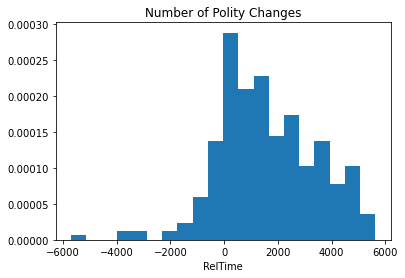

In [102]:
plt.hist(Relationships["Polity.End.Scaled"], bins =20, density = True)
plt.title("Number of Polity Changes")
plt.xlabel("RelTime")
plt.show()

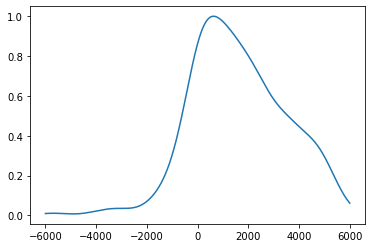

In [103]:
from scipy.stats import gaussian_kde
KDE = gaussian_kde(Relationships["Polity.End.Scaled"])
time_range = np.arange(-6000,6000,10)
KDE_t = KDE(time_range)
plt.plot(time_range, KDE_t / max(KDE_t))
plt.show()

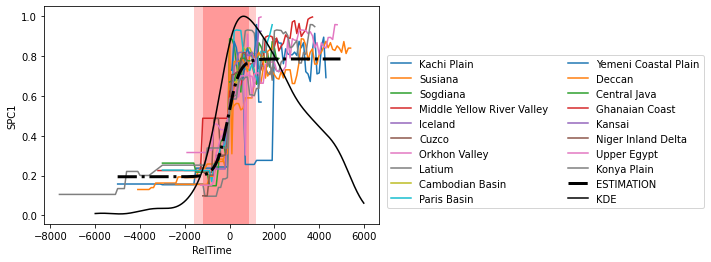

In [104]:
# Time Series Data fpr Reltime vs. SPC1
for N in list(set(RelTimeDF["NGA"])):
    DF = RelTimeDF[RelTimeDF["NGA"] == N]
    plt.plot(DF["RelTime"],   
             DF["SPC1"], label=N)
    
# Interpolation
x_show = np.arange(-1,1,0.01)    
y_hat = f(x_show, Parameters[0], Parameters[1], Parameters[2], Parameters[3])
plt.plot(x_show*T, y_hat, "-.",label="ESTIMATION", c = "k", linewidth=3) # scaled by T
plt.ylabel("SPC1")
plt.xlabel("RelTime")

# Denote the Regions of fast growth
plt.axvspan(Times[1], Times[2], facecolor='r', alpha=0.4)
plt.axvspan(Times[2], Times[3], facecolor='r', alpha=0.2)
plt.axvspan(Times[0], Times[1], facecolor='r', alpha=0.2)

# KDE of the polity changes
plt.plot(time_range, KDE_t / max(KDE_t), c="k", label="KDE")

plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)


plt.show()

## Normalise the Number of Polity Changes

Divide it by the number of existing polities at RelTime T, because if there are only few polities at an early time, we would also only expect few possible polity changes.

In [105]:
T_min, T_max = min(RelTimeDF["RelTime"]), max(RelTimeDF["RelTime"])

In [106]:
NumberPol = pd.DataFrame(columns=["RelTime", "NumberPol"])
for t in np.arange(T_min, T_max+100, 100):
    #print(t)
    #print(sum(RelTimeDF["RelTime"]==t))
    NumberPol = pd.concat([NumberPol,
                         pd.DataFrame({"RelTime": [t],
                                      "NumberPol": [sum(RelTimeDF["RelTime"]==t)]})])
NumberPol

,RelTime,NumberPol
0,-7600,1
0,-7500,1
0,-7400,1
0,-7300,1
0,-7200,1
...,...,...
0,5000,1
0,5100,1
0,5200,1
0,5300,1


In [107]:
NumberPol["NumberPol"].loc[NumberPol["RelTime"]==1000]

0    13
Name: NumberPol, dtype: object

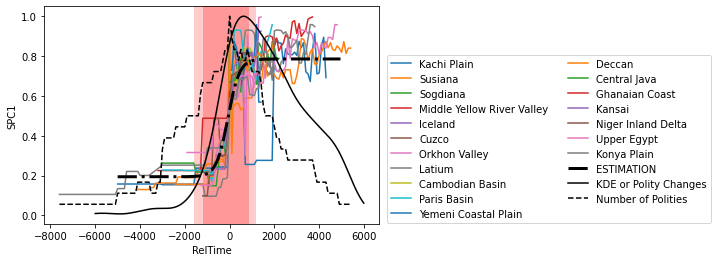

In [108]:
# Time Series Data fpr Reltime vs. SPC1
for N in list(set(RelTimeDF["NGA"])):
    DF = RelTimeDF[RelTimeDF["NGA"] == N]
    plt.plot(DF["RelTime"],   
             DF["SPC1"], label=N)
    
# Interpolation
x_show = np.arange(-1,1,0.01)    
y_hat = f(x_show, Parameters[0], Parameters[1], Parameters[2], Parameters[3])
plt.plot(x_show*T, y_hat, "-.",label="ESTIMATION", c = "k", linewidth=3) # scaled by T
plt.ylabel("SPC1")
plt.xlabel("RelTime")

# Denote the Regions of fast growth
plt.axvspan(Times[1], Times[2], facecolor='r', alpha=0.4)
plt.axvspan(Times[2], Times[3], facecolor='r', alpha=0.2)
plt.axvspan(Times[0], Times[1], facecolor='r', alpha=0.2)

# KDE of the polity changes
plt.plot(time_range, KDE_t / max(KDE_t), c="k", label="KDE or Polity Changes")

plt.plot(NumberPol["RelTime"], NumberPol["NumberPol"]/np.max(NumberPol["NumberPol"]), "--", c="k",
        label="Number of Polities")

plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)

plt.show()

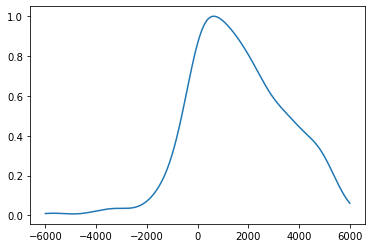

In [109]:
Changes_round = Relationships["Polity.End.Scaled"].round(-2)
KDE_round = gaussian_kde(Changes_round)
time_range = np.arange(-6000,6000,10)
kde_round = KDE_round(time_range)
plt.plot(time_range, kde_round / max(kde_round))
plt.show()

In [110]:
# take the rounded changes in polity
# and construct a frequency table
Changes_FrequencyTable = pd.DataFrame(columns = np.arange(T_min, T_max+100, 100))

for t in Changes_FrequencyTable.columns:
    Changes_FrequencyTable[int(t)] = sum(Changes_round==t)

print(Changes_FrequencyTable)


Empty DataFrame
Columns: [-7600, -7500, -7400, -7300, -7200, -7100, -7000, -6900, -6800, -6700, -6600, -6500, -6400, -6300, -6200, -6100, -6000, -5900, -5800, -5700, -5600, -5500, -5400, -5300, -5200, -5100, -5000, -4900, -4800, -4700, -4600, -4500, -4400, -4300, -4200, -4100, -4000, -3900, -3800, -3700, -3600, -3500, -3400, -3300, -3200, -3100, -3000, -2900, -2800, -2700, -2600, -2500, -2400, -2300, -2200, -2100, -2000, -1900, -1800, -1700, -1600, -1500, -1400, -1300, -1200, -1100, -1000, -900, -800, -700, -600, -500, -400, -300, -200, -100, 0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, ...]
Index: []

[0 rows x 131 columns]


In [111]:
Changes_FrequencyTable = pd.DataFrame( columns = ["RelTime", "NumberChanges", "NormedChanges"])

for t in np.arange(T_min, T_max+100, 100):
    Number_of_Polities = NumberPol["NumberPol"].loc[NumberPol["RelTime"]==t][0] # number of polities at time t
    Changes_FrequencyTable = pd.concat((Changes_FrequencyTable,
                                       pd.DataFrame(data={"RelTime": [t],
                                                         "NumberChanges": [sum(Changes_round==t)],
                                                         "NormedChanges": [sum(Changes_round==t) / Number_of_Polities]})))
    
print(Changes_FrequencyTable)

   RelTime NumberChanges  NormedChanges
0    -7600             0            0.0
0    -7500             0            0.0
0    -7400             0            0.0
0    -7300             0            0.0
0    -7200             0            0.0
..     ...           ...            ...
0     5000             4            4.0
0     5100             0            0.0
0     5200             3            3.0
0     5300             0            0.0
0     5400             2            2.0

[131 rows x 3 columns]


In [112]:
Changes_round

42      200.0
44      300.0
46      500.0
49      800.0
51      900.0
        ...  
830    4800.0
834    4900.0
858    1400.0
861    1400.0
862    1500.0
Name: Polity.End.Scaled, Length: 294, dtype: float64

In [113]:
Changes_FrequencyTable

,RelTime,NumberChanges,NormedChanges
0,-7600,0,0.0
0,-7500,0,0.0
0,-7400,0,0.0
0,-7300,0,0.0
0,-7200,0,0.0
...,...,...,...
0,5000,4,4.0
0,5100,0,0.0
0,5200,3,3.0
0,5300,0,0.0


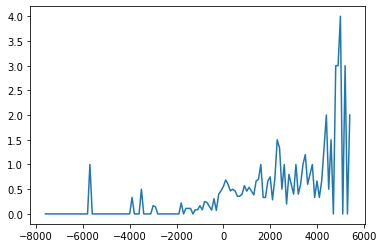

In [114]:
plt.plot(Changes_FrequencyTable["RelTime"],Changes_FrequencyTable["NormedChanges"], label ="Normed")


[]

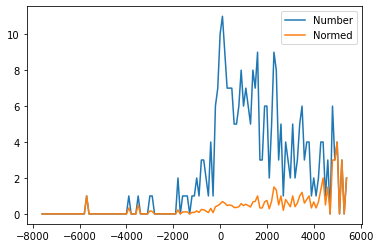

In [115]:
plt.plot(Changes_FrequencyTable["RelTime"],Changes_FrequencyTable["NumberChanges"], label="Number")
plt.plot(Changes_FrequencyTable["RelTime"],Changes_FrequencyTable["NormedChanges"], label ="Normed")
plt.legend()
plt.plot()

In [116]:
Changes_FrequencyTable

,RelTime,NumberChanges,NormedChanges
0,-7600,0,0.0
0,-7500,0,0.0
0,-7400,0,0.0
0,-7300,0,0.0
0,-7200,0,0.0
...,...,...,...
0,5000,4,4.0
0,5100,0,0.0
0,5200,3,3.0
0,5300,0,0.0


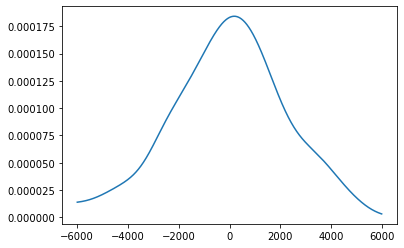

In [117]:
KDE_RelTime = gaussian_kde(RelTimeDF["RelTime"])
kde_reltime = gaussian_kde(RelTimeDF["RelTime"])
plt.plot(np.arange(-6000,6000,10), kde_reltime(np.arange(-6000,6000,10)))

In [118]:
def FT_to_Hist(df, Scale = 1):
    # Takes a frequency table
    # Scales the frequencies with Scale
    # takes the Gaussian floor function
    # and turns the frequency table into a list of events, e.g.
    # A with Frequency 2 and Scaling 2 is turned into [A, A, A, A]
    NP = df.to_numpy()
    Output = list()
    for i in range(df.shape[0]): # go through all lines
        freq = int(NP[i,1] * Scale)
        for j in range(freq): # append as often to the list as "Frequency * Scale"
            Output.append(NP[i,0])
    return(Output)

In [119]:
## Test
FT_to_Hist(pd.DataFrame(data={"Thing":["a", "b", "c"],
                             "Freq": [2, 0, 0.9]}),
          Scale = 2)

['a', 'a', 'a', 'a', 'c']

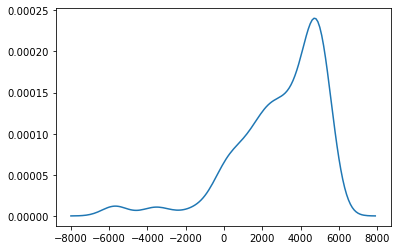

In [120]:
Normed_Changes_List = FT_to_Hist(Changes_FrequencyTable[["RelTime", "NormedChanges"]], 
                                 Scale = 10)
KDE_normed_changes = gaussian_kde(Normed_Changes_List)
yearrange = np.arange(-8000,8000,100)
kde_normed_changes = KDE_normed_changes(yearrange)
plt.plot(yearrange, kde_normed_changes)

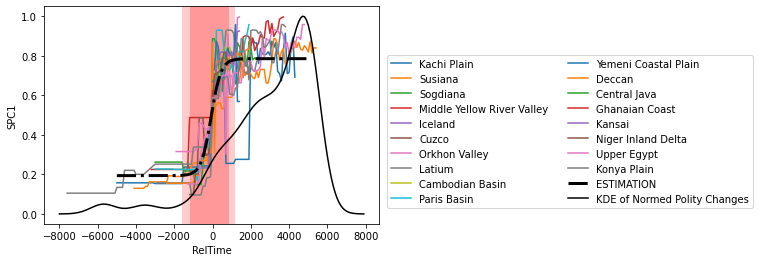

In [121]:
# Time Series Data fpr Reltime vs. SPC1
for N in list(set(RelTimeDF["NGA"])):
    DF = RelTimeDF[RelTimeDF["NGA"] == N]
    plt.plot(DF["RelTime"],   
             DF["SPC1"], label=N)
    
# Interpolation
x_show = np.arange(-1,1,0.01)    
y_hat = f(x_show, Parameters[0], Parameters[1], Parameters[2], Parameters[3])
plt.plot(x_show*T, y_hat, "-.",label="ESTIMATION", c = "k", linewidth=3) # scaled by T
plt.ylabel("SPC1")
plt.xlabel("RelTime")

# Denote the Regions of fast growth
plt.axvspan(Times[1], Times[2], facecolor='r', alpha=0.4)
plt.axvspan(Times[2], Times[3], facecolor='r', alpha=0.2)
plt.axvspan(Times[0], Times[1], facecolor='r', alpha=0.2)

# KDE of the polity changes
plt.plot(yearrange, kde_normed_changes / max(kde_normed_changes), 
         c="k", label="KDE of Normed Polity Changes")

#plt.plot(NumberPol["RelTime"], NumberPol["NumberPol"]/np.max(NumberPol["NumberPol"]), "--", c="k",
#        label="Number of Polities")

plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)

plt.show()

In [122]:
Changes_FrequencyTable.to_numpy()[:,0]

array([-7600, -7500, -7400, -7300, -7200, -7100, -7000, -6900, -6800,
       -6700, -6600, -6500, -6400, -6300, -6200, -6100, -6000, -5900,
       -5800, -5700, -5600, -5500, -5400, -5300, -5200, -5100, -5000,
       -4900, -4800, -4700, -4600, -4500, -4400, -4300, -4200, -4100,
       -4000, -3900, -3800, -3700, -3600, -3500, -3400, -3300, -3200,
       -3100, -3000, -2900, -2800, -2700, -2600, -2500, -2400, -2300,
       -2200, -2100, -2000, -1900, -1800, -1700, -1600, -1500, -1400,
       -1300, -1200, -1100, -1000, -900, -800, -700, -600, -500, -400,
       -300, -200, -100, 0, 100, 200, 300, 400, 500, 600, 700, 800, 900,
       1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000,
       2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100,
       3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200,
       4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300,
       5400], dtype=object)

In [123]:
Changes_FrequencyTable["NormedChanges"].loc[Changes_FrequencyTable["NormedChanges"]!=0]

0    1.000000
0    0.333333
0    0.500000
0    0.166667
0    0.142857
       ...   
0    3.000000
0    3.000000
0    4.000000
0    3.000000
0    2.000000
Name: NormedChanges, Length: 73, dtype: float64

In [124]:
for i in Changes_round:
    print(i,sum(Changes_round == i))

200.0 9
300.0 7
500.0 7
800.0 6
900.0 8
1100.0 7
1300.0 5
1500.0 7
1600.0 9
200.0 9
400.0 7
700.0 5
900.0 8
-1200.0 1
-900.0 1
-800.0 3
-800.0 3
-400.0 4
-400.0 4
-200.0 6
-200.0 6
0.0 10
100.0 11
100.0 11
100.0 11
300.0 7
0.0 10
100.0 11
800.0 6
1100.0 7
1300.0 5
1500.0 7
1600.0 9
1600.0 9
1900.0 6
2200.0 5
2100.0 2
-100.0 7
-100.0 7
100.0 11
-0.0 10
100.0 11
-3000.0 1
-1500.0 1
-700.0 3
0.0 10
400.0 7
4300.0 4
2000.0 6
2200.0 5
2300.0 9
2500.0 3
2800.0 4
3000.0 2
3100.0 5
3100.0 5
3200.0 2
3400.0 5
4000.0 2
4400.0 4
4300.0 4
-5700.0 1
-3900.0 1
-2900.0 1
-1600.0 1
-700.0 3
-200.0 6
100.0 11
300.0 7
800.0 6
900.0 8
1100.0 7
1200.0 6
1200.0 6
1500.0 7
-3500.0 1
-1000.0 2
0.0 10
0.0 10
300.0 7
600.0 5
800.0 6
1100.0 7
1300.0 5
1300.0 5
1700.0 3
1700.0 3
1900.0 6
1900.0 6
2300.0 9
2300.0 9
2300.0 9
2300.0 9
2300.0 9
2400.0 8
2400.0 8
2400.0 8
2400.0 8
2400.0 8
2600.0 5
2600.0 5
2900.0 3
3100.0 5
3300.0 3
3300.0 3
3300.0 3
3400.0 5
3500.0 6
3700.0 4
3800.0 4
3800.0 4
3900.0 1
-1100.0 1
-2

## Deal with the Continuity of Polities

In [125]:
 # this DF tells is, if a polity in an NGA is continuous or not
print(Relationships)
print(sorted(list(set(Relationships["NGA"])))) # only the long-lived ones remain

                      NGA    PolID               Longform.Name  Polity.Start  \
42        Cambodian Basin  KhFunaE                     Funan I         225.0   
44        Cambodian Basin  KhFunaL                    Funan II         540.0   
46        Cambodian Basin  KhChenl                      Chenla         550.0   
49        Cambodian Basin  KhAngkE                Early Angkor         802.0   
51        Cambodian Basin  KhAngkC            Classical Angkor        1100.0   
..                    ...      ...                         ...           ...   
830           Upper Egypt  TrOttm3           Ottoman Empire II        1517.0   
834           Upper Egypt  TrOttm4          Ottoman Empire III        1683.0   
858  Yemeni Coastal Plain  YeQasmi     Yemen - Qasimid Dynasty        1637.0   
861  Yemeni Coastal Plain  TrOttm4          Ottoman Empire III        1683.0   
862  Yemeni Coastal Plain  YeOttoL  Ottoman Empire Late Period        1873.0   

     Polity.End Dupl            Section

In [126]:
print(Relationships[["NGA", "Polity.End.Scaled"]].loc[Relationships["Value.From"]=="discontinuity"].iloc[50:70])

             NGA  Polity.End.Scaled
580     Sogdiana              -50.0
587     Sogdiana              529.0
593     Sogdiana             1061.0
606     Sogdiana             1712.0
699      Susiana             1617.0
708      Susiana             2300.0
710      Susiana             2500.0
713      Susiana             2600.0
726      Susiana             3740.0
744      Susiana             4762.0
745      Susiana             4762.0
746      Susiana             4857.0
747      Susiana             4857.0
754      Susiana             5039.0
756      Susiana             5039.0
757      Susiana             5201.0
764      Susiana             5422.0
765      Susiana             5625.0
784  Upper Egypt             2353.0
788  Upper Egypt             2575.0


In [127]:
Breakpoints = Relationships[["NGA", "Polity.End.Scaled"]].loc[Relationships["Value.From"]=="discontinuity"]
Breakpoints.columns = ["NGA", "RelTime"]
Breakpoints.head()

,NGA,RelTime
67,Central Java,718.0
138,Cuzco,-751.0
142,Cuzco,-401.0
145,Cuzco,-150.0
149,Cuzco,132.0


In [128]:
# Get the snippet that includes RelTime=0 and does not have any discontinuity
def Cutout(nga, df = RelTimeDF):
    
    
    Output = df.loc[df["NGA"]==nga]
    
    # if the nga has a discontinuous breakpoint, we need to cut out the central part of Output around 0
    if nga in set(Breakpoints["NGA"]):
        
        # get this nga's breakpoints
        BPs = Breakpoints.loc[Breakpoints["NGA"] == nga]
        
        
        # isolate the first breakpoint above zero
        # NOT exactly zero, because a breakpoint at zero means that up to RelTime 0, the polity has changed
        BP_positive = BPs.loc[BPs["RelTime"] > 0]
        
        if BP_positive.shape[0]>0: # is there any Breakpoint after 0?
            BP_end = min(BP_positive["RelTime"])
        else:
            BP_end = np.infty # else: latest possible year
        
        # Now need the beginning of the cutout-area, i.e. the last breakpoint before BP_end
        BP_rest = BPs.loc[BPs["RelTime"] < BP_end]
        
        
        if BP_rest.shape[0] > 0: # is there even a breakpoint before this?
            BP_start = max(BP_rest["RelTime"])
        else:
            BP_start = -np.inf # else: set the earliest possible time as beginning for the cutout
    
        print("BPs",BPs)
        print(BP_start,BP_end)
        
        Output = Output.loc[Output["RelTime"] > BP_start-1 ]
        Output = Output.loc[Output["RelTime"] < BP_end +1 ]
        
    return(Output)

In [129]:
## Test
Cutout_DF = pd.DataFrame(columns = RelTimeDF.columns)
Cutout_CCDF = pd.DataFrame(columns = RelTimeCCDF.columns)

for n in list(set(RelTimeDF["NGA"])):
    print(Cutout(n))
    Cutout_DF = pd.concat((Cutout_DF, Cutout(n)))
    Cutout_CCDF = pd.concat((Cutout_CCDF, Cutout(n, RelTimeCCDF)))

BPs              NGA  RelTime
212  Kachi Plain  -3000.0
216  Kachi Plain   -700.0
230  Kachi Plain   2540.0
237  Kachi Plain   3061.0
-700.0 2540.0
             NGA  RelTime      SPC1
474  Kachi Plain     -700  0.242890
475  Kachi Plain     -600  0.242890
476  Kachi Plain     -500  0.242890
477  Kachi Plain     -400  0.242890
478  Kachi Plain     -300  0.242890
479  Kachi Plain     -200  0.242890
480  Kachi Plain     -100  0.242890
481  Kachi Plain        0  0.679867
482  Kachi Plain      100  0.679867
483  Kachi Plain      200  0.679867
484  Kachi Plain      300  0.679867
485  Kachi Plain      400  0.679867
486  Kachi Plain      500  0.679867
487  Kachi Plain      600  0.679867
488  Kachi Plain      700  0.255631
489  Kachi Plain      800  0.255631
490  Kachi Plain      900  0.255631
491  Kachi Plain     1000  0.255631
492  Kachi Plain     1100  0.255631
493  Kachi Plain     1200  0.276092
494  Kachi Plain     1300  0.276092
495  Kachi Plain     1400  0.276092
496  Kachi Plain     150

-inf 984.0
        NGA  RelTime      SPC1
673  Latium    -2900  0.157375
674  Latium    -2800  0.157375
675  Latium    -2700  0.157375
676  Latium    -2600  0.157375
677  Latium    -2500  0.157375
678  Latium    -2400  0.157375
679  Latium    -2300  0.157375
680  Latium    -2200  0.157375
681  Latium    -2100  0.157375
682  Latium    -2000  0.157375
683  Latium    -1900  0.157375
684  Latium    -1800  0.157375
685  Latium    -1700  0.157375
686  Latium    -1600  0.157375
687  Latium    -1500  0.157375
688  Latium    -1400  0.157375
689  Latium    -1300  0.157375
690  Latium    -1200  0.157375
691  Latium    -1100  0.096128
692  Latium    -1000  0.096128
693  Latium     -900  0.096128
694  Latium     -800  0.096128
695  Latium     -700  0.096128
696  Latium     -600  0.096128
697  Latium     -500  0.140222
698  Latium     -400  0.140222
699  Latium     -300  0.183184
700  Latium     -200  0.183184
701  Latium     -100  0.189266
702  Latium        0  0.541342
703  Latium      100  0.5587

BPs              NGA  RelTime
294  Konya Plain      0.0
317  Konya Plain   2284.0
318  Konya Plain   2284.0
319  Konya Plain   2284.0
320  Konya Plain   2284.0
321  Konya Plain   2284.0
345  Konya Plain   3307.0
347  Konya Plain   3339.0
349  Konya Plain   3339.0
350  Konya Plain   3402.0
0.0 2284.0
             NGA  RelTime      SPC1
326  Konya Plain        0  0.584207
327  Konya Plain      100  0.584207
328  Konya Plain      200  0.584207
329  Konya Plain      300  0.584207
330  Konya Plain      400  0.666110
331  Konya Plain      500  0.688037
332  Konya Plain      600  0.678982
333  Konya Plain      700  0.693366
334  Konya Plain      800  0.694619
335  Konya Plain      900  0.605398
336  Konya Plain     1000  0.605398
337  Konya Plain     1100  0.600754
338  Konya Plain     1200  0.637261
339  Konya Plain     1300  0.637261
340  Konya Plain     1400  0.763214
341  Konya Plain     1500  0.887021
342  Konya Plain     1600  0.884932
343  Konya Plain     1700  0.746792
344  Konya Plai

In [130]:
Cutout_DF, Cutout_CCDF


(             NGA RelTime      SPC1
 474  Kachi Plain    -700  0.242890
 475  Kachi Plain    -600  0.242890
 476  Kachi Plain    -500  0.242890
 477  Kachi Plain    -400  0.242890
 478  Kachi Plain    -300  0.242890
 ..           ...     ...       ...
 344  Konya Plain    1800  0.778295
 345  Konya Plain    1900  0.678603
 346  Konya Plain    2000  0.926779
 347  Konya Plain    2100  0.931205
 348  Konya Plain    2200  0.929827
 
 [365 rows x 3 columns],
              NGA RelTime      SPC1    PolPop   PolTerr    CapPop    levels  \
 474  Kachi Plain    -700  0.242890  3.958214  2.395776  3.394593  2.152333   
 475  Kachi Plain    -600  0.242890  3.958214  2.395776  3.394593  2.152333   
 476  Kachi Plain    -500  0.242890  3.958214  2.395776  3.394593  2.152333   
 477  Kachi Plain    -400  0.242890  3.958214  2.395776  3.394593  2.152333   
 478  Kachi Plain    -300  0.242890  3.958214  2.395776  3.394593  2.152333   
 ..           ...     ...       ...       ...       ...       ...  

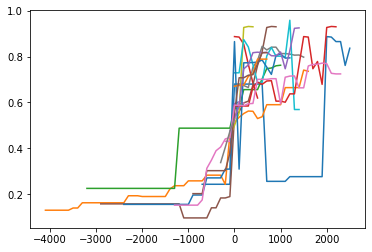

In [131]:
Cutout_DF
for n in list(set(Cutout_DF["NGA"])):
    smalldf = Cutout_DF.loc[Cutout_DF["NGA"]==n]
    #print(smalldf)
    plt.plot(smalldf["RelTime"], smalldf["SPC1"])
plt.show()

# Redo the RelTime Analysis with this Data?

## Fitting

In [132]:
X, y = Cutout_DF["RelTime"].to_numpy(), Cutout_DF["SPC1"].to_numpy()
T = 5000
X = np.array(list(X)) # for some reason, this transformation is necessary
X = X/T # normalisation of the data

def f(x, a, b, c, d):
    # the logistic function in its most general shape
    return a / (1. + np.exp(-c * (x - d))) + b

(a_, b_, c_, d_), _ = opt.curve_fit(f, X, y, p0 = Parameters)

P0 = np.array((a_, b_, c_, d_))
print(P0)

[ 5.05526190e-01  2.04512959e-01  4.20835755e+01 -2.17749685e-02]


In [133]:
# comparison with full data:
Parameters

array([ 5.91641013e-01,  1.93784865e-01,  1.93749266e+01, -1.54321375e-02])

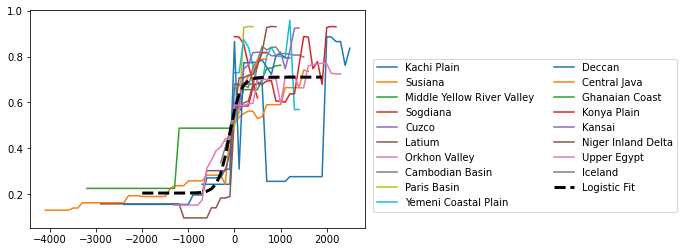

In [134]:
Cutout_DF
for n in list(set(Cutout_DF["NGA"])):
    smalldf = Cutout_DF.loc[Cutout_DF["NGA"]==n]
    #print(smalldf)
    plt.plot(smalldf["RelTime"], smalldf["SPC1"], label=n)

TimeRange = np.arange(-2000,2000,100)
New_Fit = f(TimeRange/T, a_, b_, c_, d_)
plt.plot(TimeRange, New_Fit, "--",label="Logistic Fit", c="k", linewidth = 3)
plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
plt.show()

## Out-of-Sample prediction

In [135]:
L = len(Cutout_DF["RelTime"].to_numpy())


In [136]:
def RhoSq(y_hat, y_true): # like in Turchin's original PCA paper
    y_mean = np.mean(y_true)
    return(1 - sum((y_hat-y_true)**2)/sum((y_mean-y_true)**2)  )

In [137]:
C_list = list()
RhoSqList = list()
n_split = 1000
for i in range(1000):
    
    Selection = np.random.choice(np.arange(L), size = int(L/2), replace = False)
    
    X_train = X[Selection]
    y_train = y[Selection]
    
    test_indx = np.ones(len(X), bool)
    test_indx[Selection]=0
    y_test = y[test_indx]
    X_test = X[test_indx]
    
    (a1_, b1_, c1_, d1_), _ = opt.curve_fit(f, X_train, y_train,
                                            p0 = Parameters) # initial guess to ensure c > 0
    #print((a1_, b1_, c1_, d1_))
    C_list.append(c1_)
    RhoSqList.append(RhoSq( f(X_test, a1_, b1_, c1_, d1_), y_test))
    

In [138]:
print(np.mean(RhoSqList), np.median(RhoSqList), np.std(RhoSqList))

0.7488795381444986 0.7518343301971174 0.031574702048380296


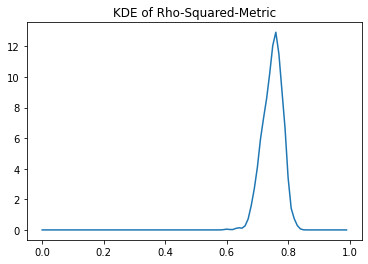

In [59]:
plt.plot(np.arange(0,1,0.01),
    gaussian_kde(RhoSqList)(np.arange(0,1,0.01)))
plt.title("KDE of Rho-Squared-Metric")
plt.show()

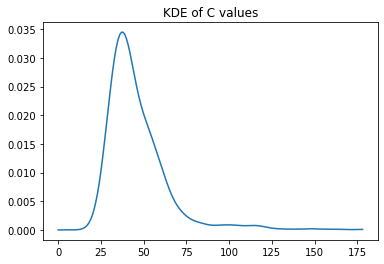

In [60]:
c_range = np.arange(0, max(C_list),1)
plt.plot(c_range,
    gaussian_kde(C_list)(c_range))
plt.title("KDE of C values")
plt.show()

In [80]:
 # Characteristic Time Scale
C_median = np.median(C_list)
# in the function, its C * (x-x_offset)
# but x is scaled via T: x = X/T
C_median_scaled = C_median/T # to cancel this out
print(C_median_scaled)

0.008267671819279487


## Bootstrapping

In [61]:

nBT = 1000 # how many Bootstraps
negCcount = 0

Params = pd.DataFrame(columns = ["a", "b", "c", "d"]) # df of the parameters
NGA_list = list(set(Cutout_DF["NGA"]))


for i in range(nBT):
    NGA_selection = random.choices(NGA_list,k=len(NGA_list))
    Data_Bootstrap = pd.DataFrame(columns = Cutout_DF.columns)

    for n in NGA_selection:
        Data_Bootstrap = pd.concat([Data_Bootstrap, Cutout_DF[Cutout_DF["NGA"]==n]])
    
    
    X, y = Data_Bootstrap["RelTime"].to_numpy(), Data_Bootstrap["SPC1"].to_numpy()

    X = np.array(list(X)) # for some reason, this transformation is necessary
    X = X/T # normalisation of the data
    (a_, b_, c_, d_), _ = opt.curve_fit(f, X, y, P0) # p0: Initial guess = Full Estimation
                                                     # Otherwise: direction can reverse with c<0

    Params = pd.concat([Params,
                       pd.DataFrame(data={"a":[a_], "b":[b_], "c":[c_], "d":[d_]})])
    if c_ < 0:
        print(NGA_selection)
        negCcount +=1
        for N in NGA_selection:
            DF = Data_RT[Data_RT["NGA"] == N]
            plt.plot(DF["RelTime"]/T,    # ALSO normalised
            DF["SPC1"], label=N)
            plt.plot(x_show, y_hat, "-.",label="ESTIMATION", c = "k", linewidth=3) # FOR FULL DATA
            plt.plot(x_show, f(x_show, a_, b_, c_, d_), "-.",c="r", linewidth = 3)

        plt.show()
        
    print(a_, b_, c_, d_)
    print("-----------------")
print(Params.round(2))

0.469646230010645 0.21402619665668665 35.98264335469986 -0.0309133362332425
-----------------
0.6073646737991281 0.1757159335692166 34.03562036170825 -0.018668410967902255
-----------------
0.4955883150721401 0.18844369546203135 43.85271579466864 -0.028319175394295258
-----------------
0.520427653940372 0.19554825110386204 48.84615041524146 -0.0221381574195406
-----------------
0.5389986316080085 0.18317322582489404 42.325134381684094 -0.01518548341868234
-----------------
0.44431166591531496 0.20710454115725127 60.05412486377318 -0.018586013930350476
-----------------
0.5707861506412265 0.18348333728410104 19.607806489494827 -0.0220156097252233
-----------------
0.5146684604468146 0.1889850518884302 38.84520956111457 -0.01793121825229723
-----------------
0.41736553648804653 0.2777867325560633 104.65410391947029 -0.013099583435580296
-----------------
0.51070630479202 0.1874242357382817 34.92560563945964 -0.03278386240984512
-----------------
0.49800341714892005 0.22447079295446573 39

0.6664555833755877 0.14311092537017006 29.262731056028624 -0.007361032866846632
-----------------
0.575216913463864 0.21884534802827607 13.840003883970216 -0.0276570792698344
-----------------
0.5505710698474082 0.19216130976828572 21.512869846823374 -0.024506987915440034
-----------------
0.4569797261958289 0.22671103397732556 37.879554062127305 -0.023735984229469303
-----------------
0.4473284487123779 0.2837737548375665 41.189914612414235 -0.011598552687605219
-----------------
0.5695075051446145 0.20714481787741798 22.605326006244212 -0.020096672444911912
-----------------
0.4762102152509551 0.2388613361386455 76.98437713359831 -0.016260780104290398
-----------------
0.5728701267399282 0.17492057731548863 28.83264664522947 -0.020427933371593918
-----------------
0.5598451872150662 0.2013845744294036 21.870770176180194 -0.026013842462846902
-----------------
0.48573689003161713 0.22632923422698834 167.8051327925271 -0.013985921880828837
-----------------
0.4801085238556676 0.1804737

0.5102859425803097 0.18569387963177425 25.722494372236515 -0.02975086954217569
-----------------
0.48164246024473356 0.2295539818558733 41.96578864692559 -0.026489962114931563
-----------------
0.5800205411227137 0.20283332996939998 18.148363874365522 -0.01804044124900935
-----------------
0.5244669179286907 0.1824918259873322 23.13925734280427 -0.03136108503678364
-----------------
0.5602233978282097 0.1991772955274628 23.082791693842953 -0.01997905958391507
-----------------
0.4864641815096007 0.21625738268602238 25.287457183292588 -0.03394652363322458
-----------------
0.5887060974573941 0.17230628751745075 56.72433389332383 -0.019523347508651655
-----------------
0.4825100529540588 0.20512674410981427 132.49949242071668 -0.016563364638558307
-----------------
0.523221092709209 0.17544223346837276 59.31740620832509 -0.02074214634887847
-----------------
0.49376220527895864 0.21869676161963766 52.47721129708776 -0.018335504948192013
-----------------
0.5204767975232807 0.212712850079

C:\Users\Tobias\AppData\Local\Temp/ipykernel_25636/1173144731.py:8: RuntimeWarning: overflow encountered in exp
  return a / (1. + np.exp(-c * (x - d))) + b


0.37989206094451733 0.2825794070940789 92.44638375348262 -0.015406513859065713
-----------------
0.5444099740056813 0.1933295121664578 19.61275773754684 -0.032493277720972255
-----------------
0.4136422728620082 0.24659749260543304 103.04362459223995 -0.015320469751616161
-----------------
0.5385086799369463 0.23440612978204212 26.320207210584112 -0.01937021752854048
-----------------
0.45308384096988547 0.23083913875406745 31.308635129819933 -0.033335907752008793
-----------------
0.5602777415922694 0.1896282916690985 31.339922461889614 -0.018311212651687836
-----------------
0.5011620290950982 0.20298876996323342 45.988174056875394 -0.021602726976552328
-----------------
0.5045915945898144 0.20586437500367732 35.87386745523112 -0.029440108095923505
-----------------
0.517069947273582 0.19832614719701336 48.226168854505936 -0.021537672650754697
-----------------
0.48904744008220746 0.19275264186860228 90.76817511047466 -0.01578242614619646
-----------------
0.49793743897078163 0.18363

0.44715023742910875 0.24193080772874975 42.35958696602424 -0.021255750100615693
-----------------
0.4587505715741621 0.22073464580333563 115.84762169979047 -0.01749212317295434
-----------------
0.47274923519387985 0.2469527360124606 67.28530558008876 -0.01604036951631572
-----------------
0.5637319846240134 0.17283790526585674 44.56344360062806 -0.016488495256549243
-----------------
0.4790904206129008 0.21001265241525044 59.13470881172006 -0.018397396737498385
-----------------
0.5277595947063989 0.18681510804804624 57.216052099383674 -0.021717151616503564
-----------------
0.5153515432069558 0.18228782277265243 41.6224303180883 -0.028071084668767766
-----------------
0.5066109311330532 0.2091085989278635 38.31211872229155 -0.01934364709842061
-----------------
0.49928145777289334 0.20931475706276903 37.58675436293025 -0.02568843871061433
-----------------
0.4734076341059339 0.2138165112576005 38.672068422946666 -0.023707467859348363
-----------------
0.5958011332700399 0.16740678928

0.5732371375421293 0.18046631467239363 33.384487734001496 -0.027493656575701703
-----------------
0.499122035174351 0.19429287280287105 47.567535710686684 -0.027940507266621287
-----------------
0.45880006474751245 0.22165754916606506 155.8300698687475 -0.01551003885506424
-----------------
0.44912926743975556 0.26866540073744666 37.28052338483491 -0.02393406364949126
-----------------
0.5150065782723178 0.16649999639601684 195.30297882958317 -0.014565944252218157
-----------------
0.5425464172347114 0.21029658882275665 22.769437270905318 -0.0326488180479104
-----------------
0.4756253973141637 0.20609323184464032 62.98523831883604 -0.019944734578929795
-----------------
0.45328190397461166 0.21269611154974455 27.725510474262236 -0.03585450509427036
-----------------
0.5315085155096742 0.20113705028156928 54.34159635507843 -0.013870977060529094
-----------------
0.5204224639418427 0.19391434023699228 40.570911362076124 -0.022644709688677007
-----------------
0.5189133233648983 0.185587

0.5273222310154942 0.2147784231874645 31.392070409764 -0.01925988545134078
-----------------
0.5645632367962697 0.2019384287574785 20.91667366349436 -0.027280090103797405
-----------------
0.4377832921659155 0.20354078922878727 167.9486552523507 -0.016760286171890335
-----------------
0.5178605600387258 0.1762656726244462 46.36881839296901 -0.02263939303247673
-----------------
0.47199580912954475 0.21567876188661259 53.08140939967818 -0.019969241582963114
-----------------
0.5051573208225417 0.18189334369757473 42.673971752626855 -0.02503168826326627
-----------------
0.5174814942619093 0.20445004727163124 31.109870410284877 -0.024826313353679994
-----------------
0.47274224346896676 0.24721636395665594 58.55143318757619 -0.016198349888281876
-----------------
0.5126819969386966 0.20778957849652543 28.844811095074927 -0.023625375741630497
-----------------
0.5547895410130339 0.21153258785115997 22.622206705051518 -0.031037242948537467
-----------------
0.47986222212393725 0.2000698128

0.49224595775870145 0.17760938734226903 147.45751932733745 -0.01604789573922368
-----------------
0.5349474161411537 0.19330498352693526 32.018786696706336 -0.021894948778151867
-----------------
0.5697510880029452 0.1648545758334192 31.17614655549554 -0.010984946094076778
-----------------
0.6164033326944255 0.16520004535492389 26.29742379357429 -0.020423439853496917
-----------------
0.5046058844700054 0.20540380258153793 38.15264211928821 -0.02740597542733526
-----------------
0.4621117093200988 0.21267604621537425 35.46042720503849 -0.029383016031682408
-----------------
0.5378725359688971 0.21576937261900148 25.3973340904784 -0.032097607973960884
-----------------
0.500308406203169 0.23010829958202936 46.531929827497166 -0.01612800850388029
-----------------
0.5820294077047324 0.18590018864806093 28.166108855114487 -0.016444096927407417
-----------------
0.4552564253390713 0.2197379137856222 58.89502077400485 -0.022321963335247785
-----------------
0.4813156856378125 0.22371028470

0.48946199105938404 0.19208747011680893 44.990914627473494 -0.023010958766933758
-----------------
0.500801890117044 0.20022641275440028 45.69615756719991 -0.022637330954629966
-----------------
0.5488405911094534 0.19626343010002684 28.165131640665024 -0.025228128518772312
-----------------
0.5393417687052753 0.18557239725287258 23.528480087295062 -0.04017977442415361
-----------------
0.4930883621431927 0.20496241291499226 53.17472628086135 -0.01824799718337345
-----------------
0.4186894227464891 0.22514279105125054 111.67702976217069 -0.01658484662340959
-----------------
0.5873730017739375 0.20872301468317678 19.769246413586504 -0.03406935768149165
-----------------
0.48369315613472136 0.22783688807044894 37.287455293016905 -0.023327653322707816
-----------------
0.5490956487791231 0.21982614394603725 19.75656681460207 -0.02498635188128878
-----------------
0.59205093649499 0.1502815583979124 49.52816822756872 -0.012837785624553616
-----------------
0.5730868708530883 0.1930532331

0.509851578813529 0.19302234956872294 45.638766507141675 -0.021076257861915457
-----------------
0.5555648443291847 0.2171829434190967 30.500347436831156 -0.0152266686710708
-----------------
0.5139472107964154 0.20643062730558123 36.41854537382852 -0.021869003794664763
-----------------
0.4188990500041905 0.20671992403861086 809.8348654433853 -0.019347895820904203
-----------------
0.5205030518535587 0.21150894325287886 28.044137389776992 -0.0226790734260826
-----------------
0.44022071316117456 0.2398978626848346 38.72400783722413 -0.02319426380876958
-----------------
0.5347335538534856 0.1851063768350085 41.542245516693036 -0.02454447510054832
-----------------
0.5384860623458222 0.19238406387334592 40.28669070672352 -0.016858605653912916
-----------------
0.4061934392958276 0.22889774290859763 137.21041754548858 -0.01666773065647391
-----------------
0.5540641629497987 0.1921776043199364 25.905193893160487 -0.019008108280632464
-----------------
0.5536998432616498 0.21004910131414

0.5210974885164072 0.18530058216702813 63.75030680864957 -0.01973815258564721
-----------------
0.6108176832357249 0.16290047941143077 32.0779490149061 -0.016480723295919847
-----------------
0.5681933238801241 0.20985870254888223 25.998004972334385 -0.021350792906833435
-----------------
0.5649761959242605 0.1816632262797754 41.89457492500011 -0.021437831651405233
-----------------
0.5100142923537149 0.20782316524371816 35.27621843906411 -0.013454760088231914
-----------------
0.5497901337702322 0.17799828195113349 31.910433678023896 -0.02185297476493687
-----------------
0.5613976368052044 0.20951443038532022 29.1261532658888 -0.017610609105266156
-----------------
0.5299851597009161 0.19681377888504495 49.75993122155866 -0.017033741713364057
-----------------
0.5296402570886011 0.19845846921204427 35.38063679370183 -0.018095990460322068
-----------------
0.46590495716075986 0.1895136931586963 64.27683317669505 -0.022526974985537976
-----------------
0.47697843207863166 0.20401022579

0.427438726026638 0.28398215111379504 74.65405859245355 -0.011101833220754122
-----------------
0.48831496411976566 0.21164806487527302 34.26529773303551 -0.025460975787365666
-----------------
0.5517198722823047 0.1943900940285755 34.401908337592346 -0.01793332221583354
-----------------
0.5729723325840104 0.19136465326695898 31.944233401631028 -0.018516827664364934
-----------------
0.5735923083406292 0.1777867342007336 35.311936872356604 -0.020871994896370594
-----------------
0.46118088860927403 0.22513655440926011 48.29727112368102 -0.02062484141782259
-----------------
0.5881740677142102 0.16476174551306919 28.846744227819176 -0.024095266148455266
-----------------
0.4726347980947798 0.19517022474331303 109.54518079254098 -0.018622030555921685
-----------------
0.5053566321610291 0.1728926069435063 74.40887813094582 -0.018500281715903406
-----------------
0.5658911636762965 0.199295668803429 17.874056445219214 -0.03007353336028152
-----------------
0.5503024421063822 0.1750130690

In [62]:
print(negCcount)

0


In [63]:
Params

,a,b,c,d
0,0.469646,0.214026,35.982643,-0.030913
0,0.607365,0.175716,34.035620,-0.018668
0,0.495588,0.188444,43.852716,-0.028319
0,0.520428,0.195548,48.846150,-0.022138
0,0.538999,0.183173,42.325134,-0.015185
...,...,...,...,...
0,0.416354,0.274004,48.570569,-0.022099
0,0.544332,0.182136,33.181979,-0.024370
0,0.478365,0.225011,44.958508,-0.023023
0,0.513620,0.183572,52.818162,-0.024689


50% centred quantiles 0.47819966315191226 0.5601647303201832
90% centred quantiles 0.4205395508167893 0.6020961862053633


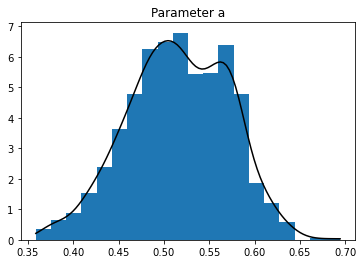

50% centred quantiles 0.18355486156519923 0.21675110177513884
90% centred quantiles 0.16426081818464372 0.2536114405417743


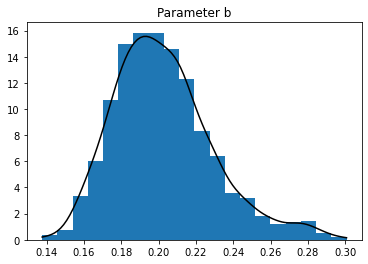

50% centred quantiles 28.926264090734595 54.69950489528874
90% centred quantiles 19.61251017514424 139.52807658457465


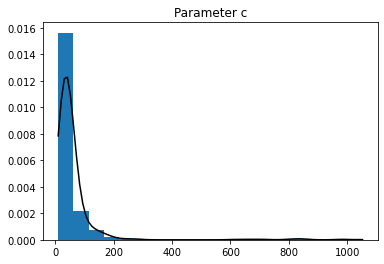

50% centred quantiles -0.025299886816825205 -0.017278821761105713
90% centred quantiles -0.03437574044877022 -0.013262302760976837


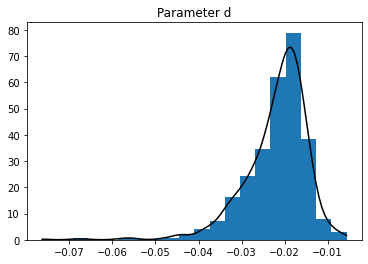

In [64]:
for P in Params.columns:
    
    
    Ps = Params[P]
    P_range = np.linspace(min(Ps), max(Ps),100)
    KDE = gaussian_kde(Ps)(P_range)
    
    print("50% centred quantiles", np.quantile(Ps, 0.25), 
          np.quantile(Ps, 0.75))
    print("90% centred quantiles", np.quantile(Ps, 0.05), 
          np.quantile(Ps, 0.95))
    plt.hist(Ps,bins=20, density= True)
    plt.plot(P_range, KDE, c="k")
    plt.title("Parameter "+str(P))
    plt.show()

### In more detail for c

In [65]:
np.quantile(Params["c"], 0.25), np.quantile(Params["c"], 0.75)

(28.926264090734595, 54.69950489528874)

[1.00000000e+00 1.25892541e+00 1.58489319e+00 1.99526231e+00
 2.51188643e+00 3.16227766e+00 3.98107171e+00 5.01187234e+00
 6.30957344e+00 7.94328235e+00 1.00000000e+01 1.25892541e+01
 1.58489319e+01 1.99526231e+01 2.51188643e+01 3.16227766e+01
 3.98107171e+01 5.01187234e+01 6.30957344e+01 7.94328235e+01
 1.00000000e+02 1.25892541e+02 1.58489319e+02 1.99526231e+02
 2.51188643e+02 3.16227766e+02 3.98107171e+02 5.01187234e+02
 6.30957344e+02 7.94328235e+02 1.00000000e+03 1.25892541e+03
 1.58489319e+03 1.99526231e+03 2.51188643e+03 3.16227766e+03
 3.98107171e+03 5.01187234e+03 6.30957344e+03 7.94328235e+03
 1.00000000e+04 1.25892541e+04 1.58489319e+04 1.99526231e+04
 2.51188643e+04 3.16227766e+04 3.98107171e+04 5.01187234e+04
 6.30957344e+04 7.94328235e+04]


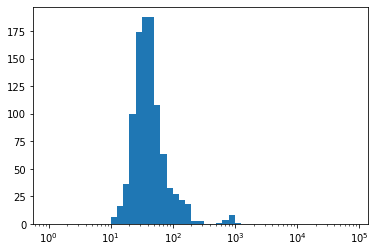

In [66]:
bins = 10**(np.arange(0,5,0.1))
print(bins)
plt.xscale('log')
plt.hist(Params["c"],bins=bins) 


plt.show()

### Analysis of the Curve

When does f(x) = y_est actually change? 
f(-infinity) = b and f(infinity) = a + b. We can now calculate the standard deviations of b and a+b via the bootstrap estimations and check when y_est exceeds b + sd(b) and reaches a+b - sd(a+b).

In [67]:
print(np.mean(Params["b"]), np.std(Params["b"]))
print(np.mean(Params["b"]+Params["a"]), np.std(Params["b"]+Params["a"]))

Thresh1 = np.mean(Params["b"]) + np.std(Params["b"])
Thresh2 = np.mean(Params["b"]+Params["a"]) - np.std(Params["b"]+Params["a"])
print(Thresh1, Thresh2)

def f1(x):
    # first threshold
    return(f(x, P0[0], P0[1], P0[2], P0[3])-Thresh1)

T1 = opt.root(f1, -0.5)

def f2(x):
    # second threshold
    return(f(x, P0[0], P0[1], P0[2], P0[3])-Thresh2)

T2 = opt.root(f2, 0.5)

0.20263355333144117 0.026731168658081155
0.7185064536816665 0.04156544574985384
0.22936472198952232 0.6769410079318127


C:\Users\Tobias\AppData\Local\Temp/ipykernel_25636/1173144731.py:8: RuntimeWarning: overflow encountered in exp
  return a / (1. + np.exp(-c * (x - d))) + b


In [68]:
Timeframe = (T2["x"] -T1["x"])[0]
t_2, t_1 = T2["x"], T1["x"]
# scale this back to original time
print("Most of the cultural evolution takes place in a time interval of ", np.round(T*Timeframe), "years.")

Most of the cultural evolution takes place in a time interval of  1899.0 years.


## Bootstrapping the Time Interval

Now we can repeat this task, but 

-> Calculate the time thresholds T1/T2 for every single Bootstrapped Data and therefore calculate a time interval with standard deviation

In [69]:
def fBT1(x):
    # first threshold for the Bootstrapping
    return(f(x, a_, b_, c_, d_)-Thresh1)

def fBT2(x):
    # second threshold for the Bootstrapping
    return(f(x, a_, b_, c_, d_)-Thresh2)


In [70]:
random.seed(1234)
nBT = 1000 # how many Bootstraps
Successes = 0

Params2 = pd.DataFrame(columns = ["a", "b", "c", "d"]) # df of the parameters

for i in range(nBT):
    
    # Select the random NGAs
    NGA_selection = random.choices(NGA_list,k=len(NGA_list))
    Data_Bootstrap = pd.DataFrame(columns = Cutout_DF.columns)

    for n in NGA_selection: # combine them to a data frame
        Data_Bootstrap = pd.concat([Data_Bootstrap, Cutout_DF[Cutout_DF["NGA"]==n]])
    
    
    X, y = Data_Bootstrap["RelTime"].to_numpy(), Data_Bootstrap["SPC1"].to_numpy()

    X = np.array(list(X)) # for some reason, this transformation is necessary
    X = X/T # normalisation of the data
    (a_, b_, c_, d_), _ = opt.curve_fit(f, X, y, P0) # p0: Initial guess = Full Estimation
                                                     # Otherwise: direction can reverse with c<0
    
    # Time Intervals
    T1 = opt.root(fBT1, t_1)
    T2 = opt.root(fBT2, t_2)
    
    # only add results, if opt.root is successful:
    if T1["success"] and T2["success"]:
        Successes += 1
        Params2 = pd.concat([Params2,
                       pd.DataFrame(data={"a":[a_], "b":[b_], "c":[c_], "d":[d_], "T1":T1["x"], "T2":T2["x"]})])    
        print(a_, b_, c_, d_, T1, T2)
        print("-----------------")


0.5101667326753361 0.1848308787253315 47.93079747657791 -0.022566644258141484     fjac: array([[-1.]])
     fun: array([-2.77555756e-17])
 message: 'The solution converged.'
    nfev: 18
     qtf: array([2.09054996e-13])
       r: array([-1.94821247])
  status: 1
 success: True
       x: array([-0.07153616])     fjac: array([[-1.]])
     fun: array([4.4408921e-16])
 message: 'The solution converged.'
    nfev: 14
     qtf: array([-9.15687526e-11])
       r: array([-0.83483925])
  status: 1
 success: True
       x: array([0.04639092])
-----------------
0.5857152370533175 0.22814670213925894 15.979565126169936 -0.027807402275234736     fjac: array([[-1.]])
     fun: array([8.32667268e-17])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([-1.02679809e-11])
       r: array([-0.01942308])
  status: 1
 success: True
       x: array([-0.41414617])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-2.33590924e-13])

C:\Users\Tobias\AppData\Local\Temp/ipykernel_25636/1173144731.py:8: RuntimeWarning: overflow encountered in exp
  return a / (1. + np.exp(-c * (x - d))) + b


0.5932488131137765 0.17849684979927402 49.11076340610696 -0.01726673051208627     fjac: array([[-1.]])
     fun: array([2.77555756e-17])
 message: 'The solution converged.'
    nfev: 15
     qtf: array([2.30926389e-13])
       r: array([-2.28395623])
  status: 1
 success: True
       x: array([-0.06545855])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 21
     qtf: array([-1.08402176e-12])
       r: array([-3.91188448])
  status: 1
 success: True
       x: array([0.01652776])
-----------------
0.4842128911629804 0.2222811686546581 32.76409783198094 -0.029831891502172584     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 17
     qtf: array([-1.66477943e-13])
       r: array([-0.228691])
  status: 1
 success: True
       x: array([-0.15832656])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 14
     qtf: array([-7.80486786e-14])
       r: array([-0.9091818

0.5384686212804876 0.1927626859950507 34.285830319189365 -0.02355306230379385     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 20
     qtf: array([2.01255679e-13])
       r: array([-1.16962818])
  status: 1
 success: True
       x: array([-0.09991786])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([-1.77380333e-12])
       r: array([-1.67371665])
  status: 1
 success: True
       x: array([0.04026653])
-----------------
0.5999444530179612 0.16350726646294664 25.05139379709763 -0.019654602969998606     fjac: array([[-1.]])
     fun: array([-9.96425165e-15])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([1.07446382e-09])
       r: array([-1.46872949])
  status: 1
 success: True
       x: array([-0.10320549])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-1.28410615e-11])
       r: array([-1.8547

0.6127748947426702 0.16734674873521266 34.43018721053254 -0.016466784786055684     fjac: array([[-1.]])
     fun: array([-9.40914013e-15])
 message: 'The solution converged.'
    nfev: 17
     qtf: array([-9.93329891e-10])
       r: array([-1.91916288])
  status: 1
 success: True
       x: array([-0.0798957])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 18
     qtf: array([-2.52020627e-14])
       r: array([-2.95434454])
  status: 1
 success: True
       x: array([0.02992081])
-----------------
0.542972963229298 0.2077509142412908 29.90332056330884 -0.01617124416056509     fjac: array([[-1.]])
     fun: array([-3.05311332e-16])
 message: 'The solution converged.'
    nfev: 14
     qtf: array([-7.69027342e-11])
       r: array([-0.62059419])
  status: 1
 success: True
       x: array([-0.12261784])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 13
     qtf: array([-4.6

0.4931857745146317 0.19247892236723113 65.20155940532055 -0.019276218421061243     fjac: array([[-1.]])
     fun: array([2.77555756e-17])
 message: 'The solution converged.'
    nfev: 32
     qtf: array([1.1354806e-13])
       r: array([-2.22513882])
  status: 1
 success: True
       x: array([-0.05785388])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 23
     qtf: array([2.78854717e-12])
       r: array([-0.55873645])
  status: 1
 success: True
       x: array([0.04233269])
-----------------
0.5047196219259241 0.2009360359548461 41.83456173060292 -0.018689425190624276     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 21
     qtf: array([3.08211789e-12])
       r: array([-1.12231288])
  status: 1
 success: True
       x: array([-0.08606506])     fjac: array([[-1.]])
     fun: array([5.55111512e-16])
 message: 'The solution converged.'
    nfev: 14
     qtf: array([-1.39287137e-10])
   

0.5457711393978475 0.16832327944705994 32.93030574477332 -0.027886259088211792     fjac: array([[-1.]])
     fun: array([-1.1379786e-14])
 message: 'The solution converged.'
    nfev: 19
     qtf: array([-1.08840653e-09])
       r: array([-1.78527475])
  status: 1
 success: True
       x: array([-0.09080819])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 13
     qtf: array([-6.69242439e-13])
       r: array([-1.14018531])
  status: 1
 success: True
       x: array([0.05157371])
-----------------
0.4639645365209478 0.22289843546575192 49.429539663194106 -0.022018867017643103     fjac: array([[-1.]])
     fun: array([-1.08246745e-15])
 message: 'The solution converged.'
    nfev: 18
     qtf: array([1.06958414e-10])
       r: array([-0.31517412])
  status: 1
 success: True
       x: array([-0.10818538])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 15
     qtf: array([-1

0.5204118244133724 0.17869009312290435 52.671718456882864 -0.019505682122071922     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 20
     qtf: array([5.43343148e-13])
       r: array([-2.40921692])
  status: 1
 success: True
       x: array([-0.06178165])     fjac: array([[-1.]])
     fun: array([-1.22124533e-15])
 message: 'The solution converged.'
    nfev: 21
     qtf: array([-1.88932314e-10])
       r: array([-1.11754032])
  status: 1
 success: True
       x: array([0.03959195])
-----------------
0.543365344613626 0.1712326127552195 34.12236919039198 -0.02731642458917455     fjac: array([[-1.]])
     fun: array([-2.77555756e-17])
 message: 'The solution converged.'
    nfev: 20
     qtf: array([2.45081733e-14])
       r: array([-1.77138869])
  status: 1
 success: True
       x: array([-0.08950178])     fjac: array([[-1.]])
     fun: array([-2.22044605e-16])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-8.6657348e-11])


0.5419756181445569 0.2089052601250604 36.38958977812926 -0.01901956048906796     fjac: array([[-1.]])
     fun: array([-2.77555756e-17])
 message: 'The solution converged.'
    nfev: 14
     qtf: array([-9.65894031e-15])
       r: array([-0.71640628])
  status: 1
 success: True
       x: array([-0.10800915])     fjac: array([[-1.]])
     fun: array([4.4408921e-16])
 message: 'The solution converged.'
    nfev: 18
     qtf: array([1.64125491e-10])
       r: array([-2.32355993])
  status: 1
 success: True
       x: array([0.03168979])
-----------------
0.5912920514156944 0.18397083021485125 32.051451716322184 -0.016103100361100145     fjac: array([[-1.]])
     fun: array([2.77555756e-17])
 message: 'The solution converged.'
    nfev: 20
     qtf: array([4.49917881e-14])
       r: array([-1.34324343])
  status: 1
 success: True
       x: array([-0.0936988])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 17
     qtf: array([-2.26485497e-14])
  

0.5180645897652024 0.19247750596523047 44.47827158970368 -0.017502266536442757     fjac: array([[-1.]])
     fun: array([-2.77555756e-17])
 message: 'The solution converged.'
    nfev: 20
     qtf: array([3.01508818e-13])
       r: array([-1.52386013])
  status: 1
 success: True
       x: array([-0.07524666])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 16
     qtf: array([1.45883305e-13])
       r: array([-1.39758543])
  status: 1
 success: True
       x: array([0.04249295])
-----------------
0.5348278789834453 0.18800075499122285 43.64091901085032 -0.026407161907646165     fjac: array([[-1.]])
     fun: array([-6.10622664e-16])
 message: 'The solution converged.'
    nfev: 18
     qtf: array([-1.54660978e-10])
       r: array([-1.66554243])
  status: 1
 success: True
       x: array([-0.08321256])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 18
     qtf: array([1.9673152e-12])
       r: ar

0.4750245664218402 0.20772507064949763 35.67470294897741 -0.02716692183149974     fjac: array([[-1.]])
     fun: array([6.49480469e-15])
 message: 'The solution converged.'
    nfev: 13
     qtf: array([5.269713e-10])
       r: array([-0.73681126])
  status: 1
 success: True
       x: array([-0.11244343])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 14
     qtf: array([-3.18634008e-14])
       r: array([-0.2046872])
  status: 1
 success: True
       x: array([0.09593763])
-----------------
0.500474828612073 0.1878804265360137 75.18589703912222 -0.017757311150792595     fjac: array([[-1.]])
     fun: array([-2.77555756e-17])
 message: 'The solution converged.'
    nfev: 19
     qtf: array([1.63508096e-13])
       r: array([-2.86049748])
  status: 1
 success: True
       x: array([-0.0497276])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 23
     qtf: array([-2.55351296e-15])
      

0.5059294694832284 0.20464478520064136 35.352406049645325 -0.018997476392717365     fjac: array([[-1.]])
     fun: array([1.22124533e-15])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([2.01631156e-10])
       r: array([-0.83120467])
  status: 1
 success: True
       x: array([-0.10297175])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 13
     qtf: array([-3.4861003e-14])
       r: array([-1.10997263])
  status: 1
 success: True
       x: array([0.05573835])
-----------------
0.5571581329880444 0.20108356589602058 18.384726003266458 -0.03980950146048102     fjac: array([[-1.]])
     fun: array([2.77555756e-17])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([7.958606e-12])
       r: array([-0.49354888])
  status: 1
 success: True
       x: array([-0.19910261])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([-1.40543133e-12])
       r: array

0.47095697655766633 0.22503670826438874 23.593104570479912 -0.036781044650327194     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 6
     qtf: array([3.29819505e-13])
       r: array([-0.10117284])
  status: 1
 success: True
       x: array([-0.23516213])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-6.45705711e-13])
       r: array([-0.43132659])
  status: 1
 success: True
       x: array([0.09742185])
-----------------
0.6089361614323834 0.17631703811120047 28.66870522713956 -0.01522597445294964     fjac: array([[-1.]])
     fun: array([-8.32667268e-17])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([5.07380526e-11])
       r: array([-1.38832488])
  status: 1
 success: True
       x: array([-0.09717514])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([3.45279361e-14]

0.5723232959521781 0.16950261847731357 31.24718545132077 -0.025527076596072715     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 18
     qtf: array([-2.71671574e-13])
       r: array([-1.67487504])
  status: 1
 success: True
       x: array([-0.09424307])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 13
     qtf: array([-6.76125822e-14])
       r: array([-1.79761413])
  status: 1
 success: True
       x: array([0.04029518])
-----------------
0.5627301569065541 0.18782606010882325 26.719485247369928 -0.018644128288159055     fjac: array([[-1.]])
     fun: array([2.77555756e-17])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([9.63118474e-14])
       r: array([-1.02796353])
  status: 1
 success: True
       x: array([-0.1133126])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-2.34005038e-11])
       r: 

0.5287414496172701 0.18269709093572706 45.90052180388613 -0.022111872220500133     fjac: array([[-1.]])
     fun: array([2.77555756e-17])
 message: 'The solution converged.'
    nfev: 21
     qtf: array([2.06223927e-14])
       r: array([-1.9530059])
  status: 1
 success: True
       x: array([-0.07298377])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 21
     qtf: array([-2.90044655e-11])
       r: array([-1.48014502])
  status: 1
 success: True
       x: array([0.03588619])
-----------------
0.5857015130572546 0.19986348167106693 20.477699931305423 -0.02206906348614259     fjac: array([[-1.]])
     fun: array([-8.8817842e-16])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([1.74197434e-10])
       r: array([-0.57369157])
  status: 1
 success: True
       x: array([-0.16547854])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([-8.95072905e-12])
 

0.5234118820021753 0.20311511835517573 37.46861118507045 -0.021040634979479826     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 21
     qtf: array([1.79178894e-12])
       r: array([-0.93421121])
  status: 1
 success: True
       x: array([-0.09954009])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-2.16526796e-12])
       r: array([-1.68190598])
  status: 1
 success: True
       x: array([0.03919996])
-----------------
0.5353658935589032 0.17803194518260293 40.04593988450177 -0.022978736067909136     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 19
     qtf: array([2.35569897e-12])
       r: array([-1.85856397])
  status: 1
 success: True
       x: array([-0.07900998])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([-1.11943788e-12])
       r: array([-1.3605

0.6103754281461741 0.16137778278372603 32.5819063919153 -0.01492583863542985     fjac: array([[-1.]])
     fun: array([-2.77555756e-17])
 message: 'The solution converged.'
    nfev: 18
     qtf: array([1.74721349e-13])
       r: array([-1.96840936])
  status: 1
 success: True
       x: array([-0.07866265])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([1.28785871e-14])
       r: array([-2.60930972])
  status: 1
 success: True
       x: array([0.03704662])
-----------------
0.6064022681298379 0.15851368288209106 42.58843146306009 -0.02169424684165892     fjac: array([[-1.]])
     fun: array([-9.15933995e-16])
 message: 'The solution converged.'
    nfev: 18
     qtf: array([2.59983673e-10])
       r: array([-2.66489172])
  status: 1
 success: True
       x: array([-0.06918876])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 18
     qtf: array([-1.79701809e-11])
  

0.4755840144045547 0.20500948164568733 70.10462712524512 -0.02028793804361432     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 21
     qtf: array([3.10113046e-13])
       r: array([-1.61997603])
  status: 1
 success: True
       x: array([-0.06192895])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 19
     qtf: array([-2.13051798e-13])
       r: array([-0.25408989])
  status: 1
 success: True
       x: array([0.04905735])
-----------------
0.5776951348797129 0.20792003554620217 14.203895584170985 -0.04177501047443038     fjac: array([[-1.]])
     fun: array([2.49800181e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-6.77514156e-11])
       r: array([-0.29329217])
  status: 1
 success: True
       x: array([-0.27098972])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-5.2727267e-11])
       r: arra

0.4766030746629445 0.2206184561142436 61.301560654636106 -0.0174748245210461     fjac: array([[-1.]])
     fun: array([-2.47024623e-15])
 message: 'The solution converged.'
    nfev: 32
     qtf: array([-1.85481908e-10])
       r: array([-0.52631357])
  status: 1
 success: True
       x: array([-0.08239218])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 17
     qtf: array([-1.5277779e-12])
       r: array([-1.19032598])
  status: 1
 success: True
       x: array([0.03331571])
-----------------
0.5685292612994858 0.20172860818166558 12.769002531957806 -0.051961623139700173     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-1.22124533e-14])
       r: array([-0.33573191])
  status: 1
 success: True
       x: array([-0.2848771])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-5.69133629e-11])
       r: arr

0.5689937827839885 0.1640066518132256 35.41981069094723 -0.02524553263237208     fjac: array([[-1.]])
     fun: array([2.77555756e-17])
 message: 'The solution converged.'
    nfev: 16
     qtf: array([-2.7533531e-14])
       r: array([-2.04905892])
  status: 1
 success: True
       x: array([-0.0828961])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-1.06470388e-13])
       r: array([-1.78998397])
  status: 1
 success: True
       x: array([0.03725439])
-----------------
0.5180823640010325 0.20231572035777154 31.984016459897198 -0.02470823152234059     fjac: array([[-1.]])
     fun: array([-2.19269047e-15])
 message: 'The solution converged.'
    nfev: 13
     qtf: array([-2.82218943e-10])
       r: array([-0.81996072])
  status: 1
 success: True
       x: array([-0.11534294])     fjac: array([[-1.]])
     fun: array([-4.4408921e-16])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-1.25956023e-10])
 

0.5994986850128967 0.17716572241788278 30.490737151066483 -0.022033551761153933     fjac: array([[-1.]])
     fun: array([-1.07969189e-14])
 message: 'The solution converged.'
    nfev: 16
     qtf: array([-9.93054083e-10])
       r: array([-1.45298906])
  status: 1
 success: True
       x: array([-0.09910395])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([-1.06624709e-11])
       r: array([-2.5348467])
  status: 1
 success: True
       x: array([0.03082703])
-----------------
0.5432089096078055 0.1881599551396204 41.482339218101366 -0.016829285468859503     fjac: array([[-1.]])
     fun: array([-2.77555756e-17])
 message: 'The solution converged.'
    nfev: 18
     qtf: array([-2.30506725e-11])
       r: array([-1.57961259])
  status: 1
 success: True
       x: array([-0.07709721])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 17
     qtf: array([-2.79559709e-11])
       r

0.5981573125441191 0.17178392192368594 29.496777042888265 -0.023023888140482746     fjac: array([[-1.]])
     fun: array([-1.38777878e-16])
 message: 'The solution converged.'
    nfev: 13
     qtf: array([-7.01545211e-11])
       r: array([-1.53494612])
  status: 1
 success: True
       x: array([-0.09894564])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-4.1237902e-11])
       r: array([-2.31669694])
  status: 1
 success: True
       x: array([0.03434738])
-----------------
0.5139009583528621 0.17839788418191577 63.27834430597436 -0.019079865516475437     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 25
     qtf: array([3.84969834e-14])
       r: array([-2.90524358])
  status: 1
 success: True
       x: array([-0.05394819])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 17
     qtf: array([9.91429161e-14])
       r: a

0.5449346413284974 0.2129839615637594 23.93040986614676 -0.02232285933855022     fjac: array([[-1.]])
     fun: array([-1.58206781e-15])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-1.72522802e-10])
       r: array([-0.38021138])
  status: 1
 success: True
       x: array([-0.16749535])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-3.73038267e-11])
       r: array([-1.64986634])
  status: 1
 success: True
       x: array([0.0506228])
-----------------
0.48949928210912963 0.2070077228743627 28.24070587683303 -0.03306502862170968     fjac: array([[-1.]])
     fun: array([-3.05311332e-16])
 message: 'The solution converged.'
    nfev: 13
     qtf: array([-7.89199539e-11])
       r: array([-0.60253798])
  status: 1
 success: True
       x: array([-0.14069316])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 13
     qtf: array([2.66068279e-11])
       r: arr

0.5475514535654081 0.1958852680690254 68.62566593954604 -0.018666340770470108     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 34
     qtf: array([4.31604474e-11])
       r: array([-2.15707265])
  status: 1
 success: True
       x: array([-0.05846823])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 21
     qtf: array([-4.55635529e-13])
       r: array([-4.00913478])
  status: 1
 success: True
       x: array([0.01016902])
-----------------
0.5710653233066715 0.20276692176237288 16.438640642953192 -0.03586351618153036     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([1.35585987e-13])
       r: array([-0.41686731])
  status: 1
 success: True
       x: array([-0.21951494])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-7.37299111e-13])
       r: array([-1.32252

0.5439819498059543 0.17438515583955438 23.001425767649987 -0.032036781778949405     fjac: array([[-1.]])
     fun: array([2.77555756e-17])
 message: 'The solution converged.'
    nfev: 13
     qtf: array([1.82909243e-14])
       r: array([-1.13679605])
  status: 1
 success: True
       x: array([-0.12704853])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([-1.96509475e-14])
       r: array([-0.88029581])
  status: 1
 success: True
       x: array([0.07646935])
-----------------
0.5665465870715523 0.19165572537608497 16.870477950097936 -0.03180811191018157     fjac: array([[-1.]])
     fun: array([1.58206781e-15])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([2.78764595e-10])
       r: array([-0.59382238])
  status: 1
 success: True
       x: array([-0.18834088])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-5.77315973e-15])
       r: ar

0.5247958376607232 0.17610242134649923 41.691220524099414 -0.02256147690798178     fjac: array([[-1.]])
     fun: array([-2.77555756e-17])
 message: 'The solution converged.'
    nfev: 20
     qtf: array([1.14461218e-12])
       r: array([-1.99520167])
  status: 1
 success: True
       x: array([-0.07486893])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([3.0087044e-14])
       r: array([-0.95321082])
  status: 1
 success: True
       x: array([0.05035586])
-----------------
0.5663819605668599 0.1827852913083444 20.45150623282017 -0.02388576545148903     fjac: array([[-1.]])
     fun: array([2.77555756e-17])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([6.38100683e-14])
       r: array([-0.87427576])
  status: 1
 success: True
       x: array([-0.14183747])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([-5.20028465e-13])
  

0.5412549028229428 0.20543661688552878 23.013532673794494 -0.020983575350907554     fjac: array([[-1.]])
     fun: array([-4.99600361e-16])
 message: 'The solution converged.'
    nfev: 13
     qtf: array([-1.07280018e-10])
       r: array([-0.52632337])
  status: 1
 success: True
       x: array([-0.15454069])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([-2.87658786e-13])
       r: array([-1.39834572])
  status: 1
 success: True
       x: array([0.06205468])
-----------------
0.5775662590862541 0.17619803704460094 32.64284063178899 -0.019904336210252446     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 19
     qtf: array([2.81163981e-14])
       r: array([-1.57575264])
  status: 1
 success: True
       x: array([-0.09002146])     fjac: array([[-1.]])
     fun: array([2.99760217e-15])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([4.80775864e-10]

0.5658924146934877 0.1870106128058483 22.2698196543739 -0.019666916095023464     fjac: array([[-1.]])
     fun: array([-2.77555756e-17])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([8.00221001e-13])
       r: array([-0.87262356])
  status: 1
 success: True
       x: array([-0.13257958])     fjac: array([[-1.]])
     fun: array([5.55111512e-16])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-2.11450968e-10])
       r: array([-1.46458631])
  status: 1
 success: True
       x: array([0.06403515])
-----------------
0.5521470512848351 0.1994854095540604 42.77340799997097 -0.01966434610757983     fjac: array([[-1.]])
     fun: array([-2.13717932e-15])
 message: 'The solution converged.'
    nfev: 20
     qtf: array([3.10192344e-10])
       r: array([-1.20888752])
  status: 1
 success: True
       x: array([-0.08655203])     fjac: array([[-1.]])
     fun: array([5.55111512e-16])
 message: 'The solution converged.'
    nfev: 15
     qtf: array([-2.10535

0.514229082178784 0.2100644668716857 50.01555777665059 -0.014375782167821665     fjac: array([[-1.]])
     fun: array([-5.60662627e-15])
 message: 'The solution converged.'
    nfev: 18
     qtf: array([-4.60882194e-10])
       r: array([-0.9290712])
  status: 1
 success: True
       x: array([-0.07924151])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 17
     qtf: array([2.84938739e-12])
       r: array([-2.15027344])
  status: 1
 success: True
       x: array([0.03137887])
-----------------
0.5714547007289483 0.15928777737651933 52.64523122339323 -0.015953769643518474     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 21
     qtf: array([1.22152288e-13])
       r: array([-3.23681168])
  status: 1
 success: True
       x: array([-0.05333163])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 19
     qtf: array([-3.67483821e-14])
       r: arra

0.502358151971183 0.21188874582729025 45.224020563386894 -0.02356791421425557     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 22
     qtf: array([9.55099888e-12])
       r: array([-0.76284073])
  status: 1
 success: True
       x: array([-0.09704831])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 21
     qtf: array([-2.27292629e-11])
       r: array([-1.5618359])
  status: 1
 success: True
       x: array([0.03222099])
-----------------
0.5101842561657046 0.21662019531136686 33.06454399672073 -0.0221664791077832     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 15
     qtf: array([3.48013285e-12])
       r: array([-0.41086522])
  status: 1
 success: True
       x: array([-0.13299131])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 14
     qtf: array([-5.17363929e-14])
       r: array([-1.48757333])
  status:

0.6314748160939414 0.15433474058784444 47.0390298673724 -0.012644227061871743     fjac: array([[-1.]])
     fun: array([-2.77555756e-17])
 message: 'The solution converged.'
    nfev: 18
     qtf: array([1.74019132e-12])
       r: array([-3.10999156])
  status: 1
 success: True
       x: array([-0.05524035])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 19
     qtf: array([-1.3211654e-14])
       r: array([-4.23817963])
  status: 1
 success: True
       x: array([0.0207044])
-----------------
0.507319301943642 0.20650011212918506 53.35475887931326 -0.016728676473884204     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 22
     qtf: array([4.66304773e-12])
       r: array([-1.16495463])
  status: 1
 success: True
       x: array([-0.07395757])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 19
     qtf: array([-7.00827174e-11])
  

0.496841821309854 0.21587707470862735 47.448678874256856 -0.015422573235742143     fjac: array([[-1.]])
     fun: array([-2.77555756e-17])
 message: 'The solution converged.'
    nfev: 22
     qtf: array([4.60337324e-12])
       r: array([-0.62259843])
  status: 1
 success: True
       x: array([-0.09085092])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 21
     qtf: array([-2.58264521e-11])
       r: array([-1.57536941])
  status: 1
 success: True
       x: array([0.03845051])
-----------------
0.5936129319778238 0.16933945703548076 42.32346785771091 -0.016076640127446553     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 20
     qtf: array([4.55688265e-12])
       r: array([-2.28358881])
  status: 1
 success: True
       x: array([-0.06769949])     fjac: array([[-1.]])
     fun: array([2.10942375e-15])
 message: 'The solution converged.'
    nfev: 15
     qtf: array([-4.95597896e-10])
       r: a

0.5548930924645045 0.19209956018686758 22.177394198772273 -0.02591546018212016     fjac: array([[-1.]])
     fun: array([-1.52655666e-15])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([2.77980444e-10])
       r: array([-0.7709466])
  status: 1
 success: True
       x: array([-0.1445587])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([-1.1957102e-13])
       r: array([-1.35743569])
  status: 1
 success: True
       x: array([0.06131702])
-----------------
0.5654388751671425 0.20595073091162214 18.856321194061785 -0.02605228359915484     fjac: array([[-1.]])
     fun: array([-2.77555756e-17])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-9.40914013e-15])
       r: array([-0.4232198])
  status: 1
 success: True
       x: array([-0.1926796])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([-6.16173

0.564344779458059 0.18812866517171203 25.5853314636647 -0.012640761805117416     fjac: array([[-1.]])
     fun: array([1.1379786e-15])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([2.54378935e-10])
       r: array([-0.97794328])
  status: 1
 success: True
       x: array([-0.11193501])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([-8.03468403e-13])
       r: array([-1.67387164])
  status: 1
 success: True
       x: array([0.06034702])
-----------------
0.5308157770947803 0.20134459994983617 34.34558970691517 -0.020060933996028197     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([2.65093503e-13])
       r: array([-0.91156732])
  status: 1
 success: True
       x: array([-0.1041259])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([-1.73102643e-11])
   

0.5425649781985582 0.1989122475467656 24.928668214754456 -0.030470802597782662     fjac: array([[-1.]])
     fun: array([-2.1649349e-15])
 message: 'The solution converged.'
    nfev: 13
     qtf: array([-2.8993824e-10])
       r: array([-0.71652617])
  status: 1
 success: True
       x: array([-0.14368893])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([3.53572727e-11])
       r: array([-1.41743882])
  status: 1
 success: True
       x: array([0.04985616])
-----------------
0.5027657304478316 0.20108770925924863 26.0015178445924 -0.03663144892359521     fjac: array([[-1.]])
     fun: array([-1.94289029e-16])
 message: 'The solution converged.'
    nfev: 13
     qtf: array([-6.03233297e-11])
       r: array([-0.69389086])
  status: 1
 success: True
       x: array([-0.14509391])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([-6.08596507e-11])
 

0.5144637321780575 0.2104377037691186 39.24236066008315 -0.016307258039899675     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 16
     qtf: array([1.11729792e-11])
       r: array([-0.71541681])
  status: 1
 success: True
       x: array([-0.09950946])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([5.38791234e-13])
       r: array([-1.70662495])
  status: 1
 success: True
       x: array([0.04166298])
-----------------
0.5038942765977118 0.21446680010088667 37.201226481908584 -0.021168754183367215     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 13
     qtf: array([3.20854454e-14])
       r: array([-0.53783513])
  status: 1
 success: True
       x: array([-0.11501333])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 13
     qtf: array([-1.63202785e-14])
       r: array([-1.41421744])
  stat

0.5003924288548128 0.2109838962385827 78.02190762335198 -0.018801163436011036     fjac: array([[-1.]])
     fun: array([-2.77555756e-17])
 message: 'The solution converged.'
    nfev: 38
     qtf: array([7.77755638e-12])
       r: array([-1.38142968])
  status: 1
 success: True
       x: array([-0.06066966])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 21
     qtf: array([-3.50730556e-12])
       r: array([-2.50181989])
  status: 1
 success: True
       x: array([0.01458703])
-----------------
0.6069506028557898 0.15444842430919106 29.405670635939956 -0.021287204458762674     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 19
     qtf: array([-1.93558225e-11])
       r: array([-1.93104925])
  status: 1
 success: True
       x: array([-0.08795246])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([-5.38312728e-11])
       r:

0.5767852327928638 0.19220542838431617 30.157839725320976 -0.013879514662055774     fjac: array([[-1.]])
     fun: array([-2.77555756e-17])
 message: 'The solution converged.'
    nfev: 13
     qtf: array([9.99283989e-13])
       r: array([-1.04844653])
  status: 1
 success: True
       x: array([-0.10260146])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([8.97570906e-12])
       r: array([-2.33299058])
  status: 1
 success: True
       x: array([0.04120651])
-----------------
0.5087438976923487 0.18114502384400866 63.89247943342038 -0.019895334716790204     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 21
     qtf: array([2.153e-13])
       r: array([-2.7888647])
  status: 1
 success: True
       x: array([-0.05521401])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 24
     qtf: array([-1.30340183e-13])
       r: array([-0.80621963]

0.5390656638304347 0.20603328416758432 38.586593175972276 -0.026415486530695455     fjac: array([[-1.]])
     fun: array([-2.77555756e-17])
 message: 'The solution converged.'
    nfev: 16
     qtf: array([-8.763823e-13])
       r: array([-0.86131522])
  status: 1
 success: True
       x: array([-0.10664516])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 19
     qtf: array([-1.49535939e-12])
       r: array([-2.29745476])
  status: 1
 success: True
       x: array([0.02367534])
-----------------
0.5179084659683022 0.2068134522023763 43.44717356402175 -0.014899120519439875     fjac: array([[-1.]])
     fun: array([-2.77555756e-17])
 message: 'The solution converged.'
    nfev: 21
     qtf: array([1.08184295e-11])
       r: array([-0.937127])
  status: 1
 success: True
       x: array([-0.08600818])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 18
     qtf: array([1.21628263e-11])
       r: arra

0.5679383940238355 0.19171589041442358 22.29132617501233 -0.021400816987164006     fjac: array([[-1.]])
     fun: array([2.77555756e-17])
 message: 'The solution converged.'
    nfev: 13
     qtf: array([3.08364445e-14])
       r: array([-0.78360871])
  status: 1
 success: True
       x: array([-0.14006228])     fjac: array([[-1.]])
     fun: array([1.33226763e-15])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-3.69752007e-10])
       r: array([-1.57526939])
  status: 1
 success: True
       x: array([0.05796785])
-----------------
0.6025142847781626 0.18189452238568748 26.980933979270056 -0.015127522892288432     fjac: array([[-1.]])
     fun: array([-1.38777878e-16])
 message: 'The solution converged.'
    nfev: 13
     qtf: array([-5.63554481e-11])
       r: array([-1.17987846])
  status: 1
 success: True
       x: array([-0.10626393])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([-4.

0.557301422089674 0.1851628698585862 25.451595023207414 -0.02220878003172057     fjac: array([[-1.]])
     fun: array([-2.77555756e-17])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([-3.68566289e-12])
       r: array([-1.03577828])
  status: 1
 success: True
       x: array([-0.11853686])     fjac: array([[-1.]])
     fun: array([4.3298698e-15])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([6.09700845e-10])
       r: array([-1.47158946])
  status: 1
 success: True
       x: array([0.05698555])
-----------------
0.5709995190930716 0.20260282521818762 12.606521953117994 -0.04718409163096111     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-1.63202785e-14])
       r: array([-0.3215622])
  status: 1
 success: True
       x: array([-0.28614031])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-9.78939152e-12])
    

0.5672550828722507 0.17034147120561613 25.000761589872297 -0.0268046605197108     fjac: array([[-1.]])
     fun: array([-9.2148511e-15])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([1.02121137e-09])
       r: array([-1.3220983])
  status: 1
 success: True
       x: array([-0.11292229])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 13
     qtf: array([-7.19313498e-13])
       r: array([-1.35428539])
  status: 1
 success: True
       x: array([0.05809314])
-----------------
0.49308790871425046 0.1894376211640246 58.65832200637539 -0.016271878295705627     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 18
     qtf: array([1.94584071e-11])
       r: array([-2.15241422])
  status: 1
 success: True
       x: array([-0.05768445])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 18
     qtf: array([-1.82907023e-11])
       r: arr

0.5695503175594888 0.19592182935119257 28.027718128434927 -0.023884092492824957     fjac: array([[-1.]])
     fun: array([-4.71844785e-16])
 message: 'The solution converged.'
    nfev: 13
     qtf: array([1.2422155e-10])
       r: array([-0.88229323])
  status: 1
 success: True
       x: array([-0.12287521])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([-6.80566714e-14])
       r: array([-2.09562753])
  status: 1
 success: True
       x: array([0.03650444])
-----------------
0.5241169842599751 0.17704101690643279 52.37845028073792 -0.02059480610411262     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 23
     qtf: array([6.34770014e-14])
       r: array([-2.4670312])
  status: 1
 success: True
       x: array([-0.06257947])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 21
     qtf: array([-9.60898028e-13])
       r: ar

0.5013235458163156 0.21673816630778048 32.2277234127044 -0.021923938562568045     fjac: array([[-1.]])
     fun: array([5.10702591e-15])
 message: 'The solution converged.'
    nfev: 15
     qtf: array([3.96646688e-10])
       r: array([-0.39667104])
  status: 1
 success: True
       x: array([-0.13536479])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([6.52955467e-12])
       r: array([-1.21652521])
  status: 1
 success: True
       x: array([0.05301637])
-----------------
0.5115273306835407 0.21708638339791947 37.002581625694965 -0.016420848652546897     fjac: array([[-1.]])
     fun: array([-2.22044605e-16])
 message: 'The solution converged.'
    nfev: 13
     qtf: array([5.05016029e-11])
       r: array([-0.44342667])
  status: 1
 success: True
       x: array([-0.11655625])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-2.15938378e-13])


       x: array([-0.15669885])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-3.11783932e-12])
       r: array([-1.68664353])
  status: 1
 success: True
       x: array([0.05465686])
-----------------
0.5611713976637802 0.1687120941748425 46.44787011304041 -0.019793475606479767     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 22
     qtf: array([2.01097472e-12])
       r: array([-2.51269833])
  status: 1
 success: True
       x: array([-0.06523113])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 20
     qtf: array([-6.69464484e-14])
       r: array([-2.22707054])
  status: 1
 success: True
       x: array([0.02890038])
-----------------
0.528108145715666 0.17608695720577974 28.879272068975045 -0.034104632377770866     fjac: array([[-1.]])
     fun: array([-2.49800181e-16])
 message: 'The solution converged

0.4983616140963073 0.1795327774532137 55.73660396102517 -0.019588756324058196     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 24
     qtf: array([8.28170865e-13])
       r: array([-2.49974084])
  status: 1
 success: True
       x: array([-0.05901202])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 21
     qtf: array([-4.21884749e-14])
       r: array([-0.0530367])
  status: 1
 success: True
       x: array([0.09267408])
-----------------
0.53205600689919 0.1888847201277293 35.94504330640929 -0.020159668630248852     fjac: array([[-1.]])
     fun: array([-3.60822483e-16])
 message: 'The solution converged.'
    nfev: 19
     qtf: array([1.06583214e-10])
       r: array([-1.3443557])
  status: 1
 success: True
       x: array([-0.0896215])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 14
     qtf: array([-1.24966704e-12])
       r: array([-1.45077998])

0.5724280185322813 0.18617934191314353 32.33794589880513 -0.020240232822259348     fjac: array([[-1.]])
     fun: array([2.77555756e-17])
 message: 'The solution converged.'
    nfev: 19
     qtf: array([6.75848266e-14])
       r: array([-1.29116913])
  status: 1
 success: True
       x: array([-0.09773263])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-2.61181077e-11])
       r: array([-2.26414897])
  status: 1
 success: True
       x: array([0.03521525])
-----------------
0.5510952890600611 0.19856844720204916 24.37051067491723 -0.031052638027199063     fjac: array([[-1.]])
     fun: array([-2.77555756e-17])
 message: 'The solution converged.'
    nfev: 14
     qtf: array([1.37667655e-14])
       r: array([-0.70858038])
  status: 1
 success: True
       x: array([-0.1470539])     fjac: array([[-1.]])
     fun: array([1.44328993e-15])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-3.60

0.5155036622685524 0.17003205767548746 50.61365158333769 -0.021137598186229626     fjac: array([[-1.]])
     fun: array([2.77555756e-17])
 message: 'The solution converged.'
    nfev: 20
     qtf: array([6.23981422e-12])
       r: array([-2.65740419])
  status: 1
 success: True
       x: array([-0.06143716])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 16
     qtf: array([3.12548876e-11])
       r: array([-0.42775532])
  status: 1
 success: True
       x: array([0.05941743])
-----------------


In [71]:
print(Successes)
print(Params2.round(2))

744
       a     b      c     d    T1    T2
0   0.51  0.18  47.93 -0.02 -0.07  0.05
0   0.59  0.23  15.98 -0.03 -0.41  0.05
0   0.59  0.18  49.11 -0.02 -0.07  0.02
0   0.48  0.22  32.76 -0.03 -0.16  0.05
0   0.54  0.22  27.81 -0.02 -0.17  0.04
..   ...   ...    ...   ...   ...   ...
0   0.49  0.19  58.12 -0.02 -0.06  0.04
0   0.58  0.17  35.09 -0.02 -0.08  0.04
0   0.49  0.22  30.54 -0.03 -0.15  0.05
0   0.50  0.20  45.31 -0.02 -0.08  0.05
0   0.52  0.17  50.61 -0.02 -0.06  0.06

[744 rows x 6 columns]


In [72]:
T2_scaled, T1_scaled = np.mean(Params2["T2"])*T, T*np.mean(Params2["T1"])

T1_start_scaled = T*np.mean(Params2["T1"]) - T*np.std(Params2["T1"])
T2_end_scaled = T*np.mean(Params2["T2"]) + T*np.std(Params2["T2"])

In [73]:
TimeframeBT = Params2["T2"]-Params2["T1"]
print(np.mean(TimeframeBT))

# times T for the transformation to years
print("Most of the cultural evolution takes place in a time interval of ", np.round(T*np.mean(TimeframeBT)),
      u"\u00B1",np.round(T*np.std(TimeframeBT)), "years.")

0.16332522657487553
Most of the cultural evolution takes place in a time interval of  817.0 ± 350.0 years.


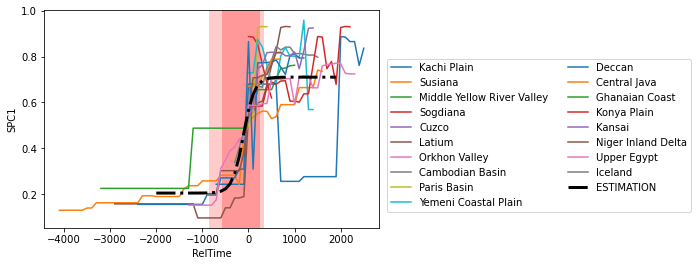

In [74]:
DF_Out_cutout = pd.DataFrame(columns=["NGA","RelTime","SPC1"])

for N in list(set(Cutout_DF["NGA"])):
    DF = Cutout_DF[Cutout_DF["NGA"] == N]
    plt.plot(DF["RelTime"],   
             DF["SPC1"], label=N)
    DF_Out_cutout = pd.concat((DF_Out_cutout, DF[["NGA", "RelTime", "SPC1"]]))
    #print(N)
    
plt.plot(TimeRange, New_Fit, "-.",label="ESTIMATION", c = "k", linewidth=3)
plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
plt.ylabel("SPC1")
plt.xlabel("RelTime")
plt.axvspan(T1_scaled, T2_scaled, facecolor='r', alpha=0.4)
plt.axvspan(T2_scaled, T2_end_scaled, facecolor='r', alpha=0.2)
plt.axvspan(T1_start_scaled, T1_scaled, facecolor='r', alpha=0.2)
plt.savefig("SPC1_Time_Interval_Cutouts")
plt.show()

In [75]:
Cutout_CCDF.index = np.arange(0,len(Cutout_CCDF["NGA"]))
Cutout_CCDF.to_csv("Cutouts_CC_with_Reltime.csv")